<a href="https://colab.research.google.com/github/daegeunbae/daegeunbae/blob/main/2022_08_03_%EC%87%BC%ED%95%91%EB%AA%B0_%EC%A7%80%EC%A0%90%EB%B3%84_%EB%A7%A4%EC%B6%9C%EC%95%A1_%EC%98%88%EC%B8%A1_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#참고 Tensorflow 101 - 9. 레모네이드 판매 예측 (실습)
#https://www.youtube.com/watch?v=fmgcGETysRo&list=PLlTt-TJxucNA5euTPOif9DjUAIUF5gkgG&index=7
#https://www.youtube.com/watch?v=WNxCtO0m1m4&list=PLlTt-TJxucNA5euTPOif9DjUAIUF5gkgG&index=8
#https://keras.io/ko/getting-started/sequential-model-guide/
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
from matplotlib import rc
rc('font', family='AppleGothic')
import warnings
warnings.filterwarnings('ignore')

from matplotlib import gridspec
from matplotlib import dates

import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

import sys
import scipy
import sklearn
from IPython.display import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
import tensorflow.keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD


train = pd.read_csv("/content/drive/MyDrive/02.coding/10.Team_Project/05.쇼핑몰 지점별 매출액 예측 경진대회/train.csv", encoding="utf-8")
test = pd.read_csv("/content/drive/MyDrive/02.coding/10.Team_Project/05.쇼핑몰 지점별 매출액 예측 경진대회/test.csv", encoding="utf-8")
sample_submission = pd.read_csv("/content/drive/MyDrive/02.coding/10.Team_Project/05.쇼핑몰 지점별 매출액 예측 경진대회/sample_submission.csv", encoding="utf-8")

## 1.데이터 준비

In [3]:
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


In [4]:
test.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday
0,1,1,05/10/2012,68.55,3.617,8077.89,NaN,18.22,3617.43,3626.14,6.573,False
1,2,1,12/10/2012,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,6.573,False
2,3,1,19/10/2012,67.97,3.594,950.33,NaN,4.93,80.25,2312.85,6.573,False
3,4,1,26/10/2012,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,False
4,5,2,05/10/2012,70.27,3.617,6037.76,NaN,10.04,3027.37,3853.40,6.170,False


In [5]:
sample_submission.head()

,id,Weekly_Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


## 2.데이터 확인

### 결측치 확인

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6255 non-null   int64  
 1   Store         6255 non-null   int64  
 2   Date          6255 non-null   object 
 3   Temperature   6255 non-null   float64
 4   Fuel_Price    6255 non-null   float64
 5   Promotion1    2102 non-null   float64
 6   Promotion2    1592 non-null   float64
 7   Promotion3    1885 non-null   float64
 8   Promotion4    1819 non-null   float64
 9   Promotion5    2115 non-null   float64
 10  Unemployment  6255 non-null   float64
 11  IsHoliday     6255 non-null   bool   
 12  Weekly_Sales  6255 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 592.6+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f51998a0790>,
      dtype=object)

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


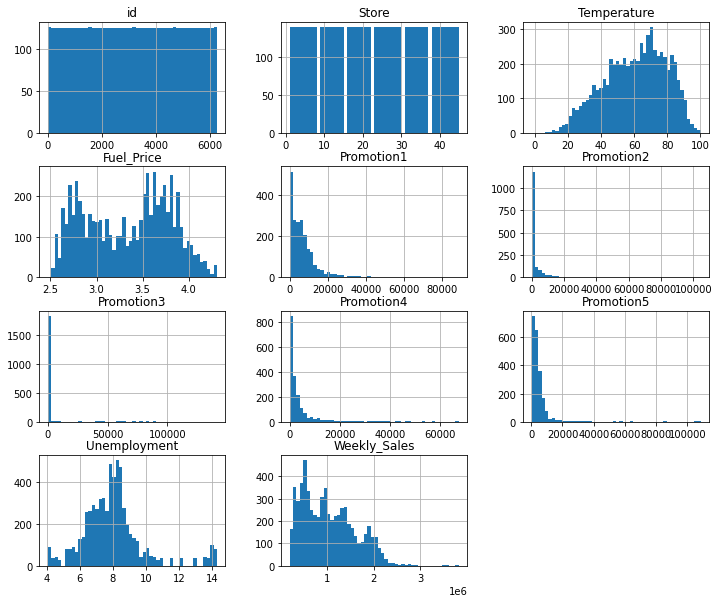

In [7]:
train.hist(bins=50, figsize=(12, 10))

### Promotion 확인

In [8]:
#해당 쇼핑몰의 비식별화된 프로모션 정보
train[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']].describe()

,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5
count,2102.000000,1592.000000,1885.000000,1819.000000,2115.000000
mean,7155.930661,3308.125810,1462.535523,3465.952501,4518.993173
std,8408.206085,9382.823804,9667.580258,6413.116294,6048.661908
min,0.270000,-265.760000,-29.100000,0.410000,135.160000
25%,1844.295000,39.755000,4.700000,499.895000,1742.305000
50%,5221.140000,205.410000,24.600000,1532.630000,3226.410000
75%,9199.242500,1931.005000,104.010000,3640.905000,5444.030000
max,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000


## 3.데이터 시각화

In [9]:
import matplotlib.pyplot as plt

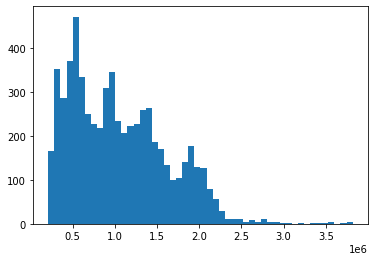

In [10]:
plt.hist(train.Weekly_Sales, bins=50)
plt.show()

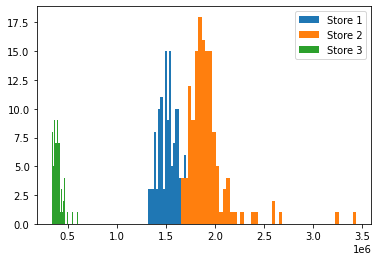

In [11]:
### 지점별 Weekly_Sales
plt.hist(train[train.Store==1].Weekly_Sales, bins=50)
plt.hist(train[train.Store==2].Weekly_Sales, bins=50)
plt.hist(train[train.Store==3].Weekly_Sales, bins=50)
plt.legend(['Store 1','Store 2','Store 3'])
plt.show()

In [12]:
train["Date"] = pd.to_datetime(train["Date"], format="%d/%m/%Y")
test["Date"] = pd.to_datetime(test["Date"], format="%d/%m/%Y")


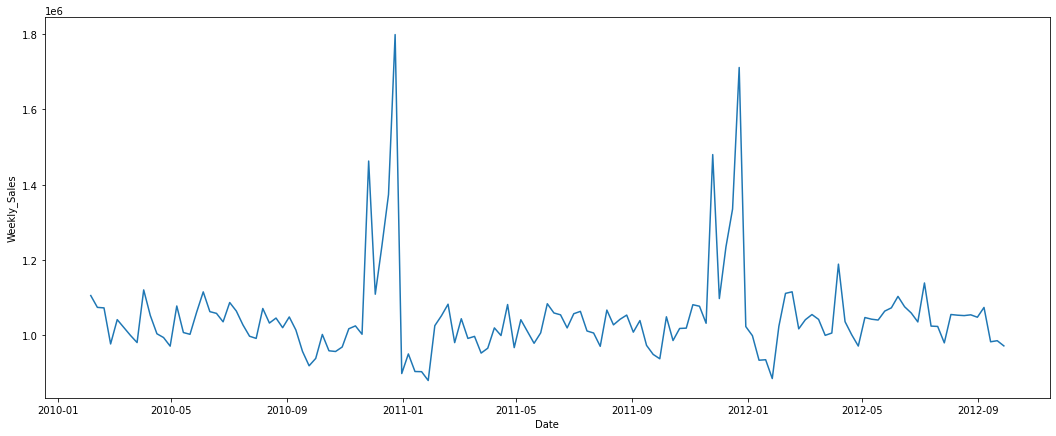

In [13]:
#급격한 매출 변화가 있음
plt.figure(figsize=(18, 7))
sns.lineplot(data=train, x="Date", y="Weekly_Sales", ci=None)
plt.show()

In [14]:
print('Minimum date:', train['Date'].min())
print('Maximum date:', train['Date'].max())

Minimum date: 2010-02-05 00:00:00
Maximum date: 2012-09-28 00:00:00


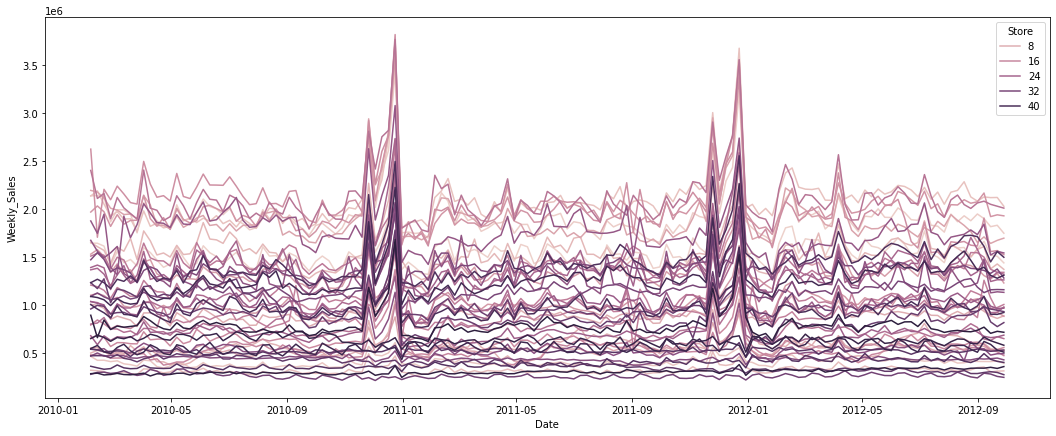

In [15]:
plt.figure(figsize=(18, 7))
sns.lineplot(data=train, x="Date", y="Weekly_Sales", ci=None, hue="Store")
plt.show()
#Store별로 나누어 찍었을때 보면, 특정 매장의 매출이 급격하게 변하는 시점이 있다는 것을 확인

In [16]:
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,2012-08-31,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,2012-09-07,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,2012-09-14,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,2012-09-21,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


In [17]:
#Temperature: 해당 쇼핑몰 주변 기온
train["Temperature"].isnull().sum(), test["Temperature"].isnull().sum()


(0, 0)

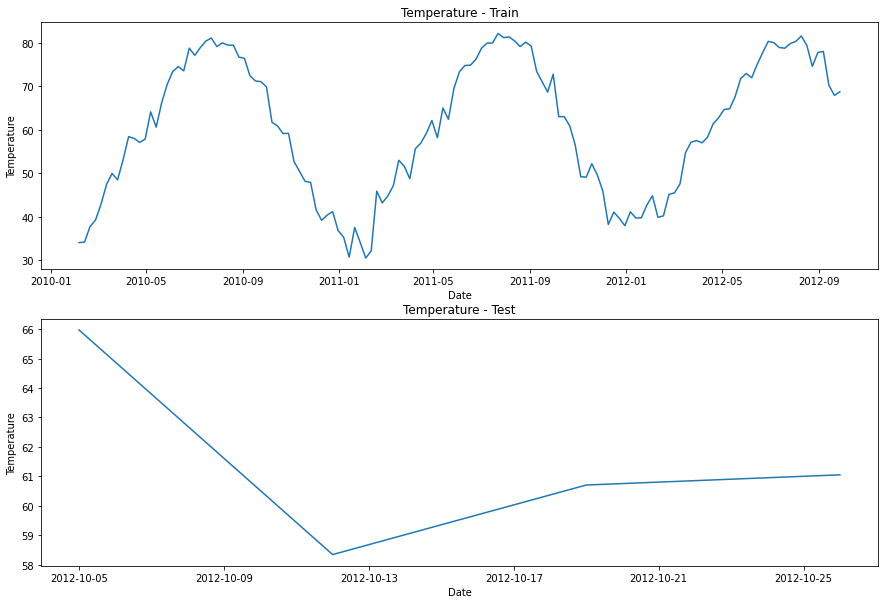

In [18]:
#신뢰구간 ci=None으로 지우기
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
sns.lineplot(data=train, x="Date", y="Temperature", ci=None, ax=ax[0]).set_title("Temperature - Train")
sns.lineplot(data=test, x="Date", y="Temperature", ci=None, ax=ax[1]).set_title("Temperature - Test")
plt.show()
#기온의 값이 생각보다 높아서, 화씨가 아닐까라는 생각을 함
#train은 12년 10월 이전의 데이터고, test는 12년 10월 이후의 데이터이므로 기온의 추이가 다른것을 볼 수 있음

In [19]:
#화씨를 섭씨로 바꾸기
train["Cel"] = train["Temperature"].apply(lambda x: round((x-32)*5/9, 1))
test["Cel"] = test["Temperature"].apply(lambda x: round((x-32)*5/9, 1))

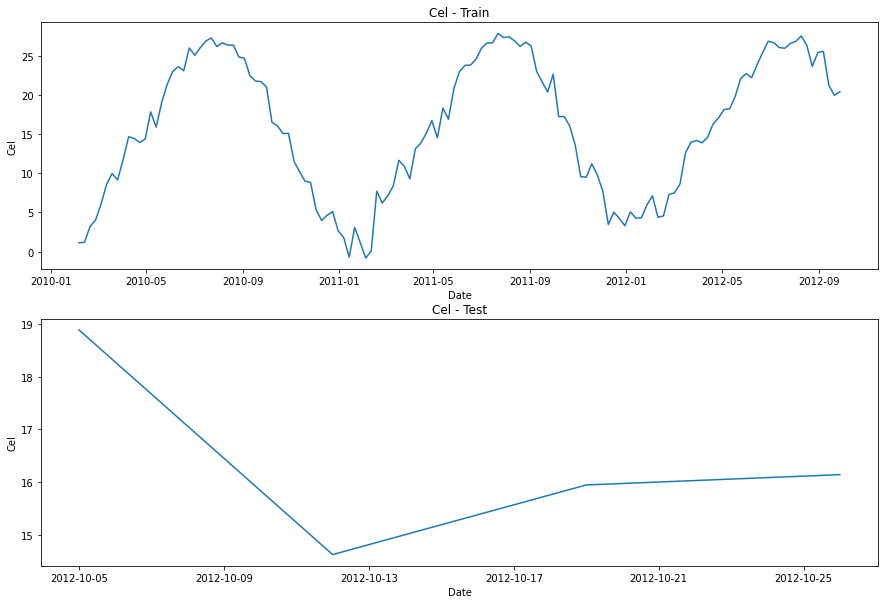

In [20]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
sns.lineplot(data=train, x="Date", y="Cel", ci=None, ax=ax[0]).set_title("Cel - Train")
sns.lineplot(data=test, x="Date", y="Cel", ci=None, ax=ax[1]).set_title("Cel - Test")
plt.show()

In [21]:
#Fuel_Price: 해당 쇼핑몰 주변 연료 가격
train["Fuel_Price"].isnull().sum(), test["Fuel_Price"].isnull().sum()

(0, 0)

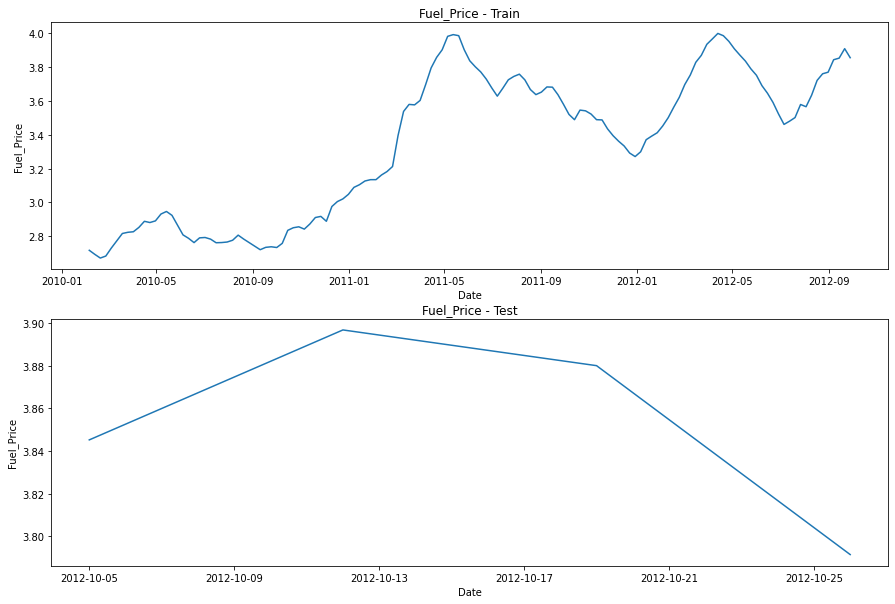

In [22]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
sns.lineplot(data=train, x="Date", y="Fuel_Price", ci=None, ax=ax[0]).set_title("Fuel_Price - Train")
sns.lineplot(data=test, x="Date", y="Fuel_Price", ci=None, ax=ax[1]).set_title("Fuel_Price - Test")
plt.show()

In [23]:
promotion = ["Promotion1", "Promotion2", "Promotion3", "Promotion4", "Promotion5"]
data = [train, test]

for pro in promotion:
    print(f"{pro}: {train[pro].isnull().sum()}")
print("---------")
for pro in promotion:
    print(f"{pro}: {test[pro].isnull().sum()}")

Promotion1: 4153
Promotion2: 4663
Promotion3: 4370
Promotion4: 4436
Promotion5: 4140
---------
Promotion1: 2
Promotion2: 135
Promotion3: 19
Promotion4: 34
Promotion5: 0


### 상관관계

전체적인 상관관계와 store에 대한 상관관계

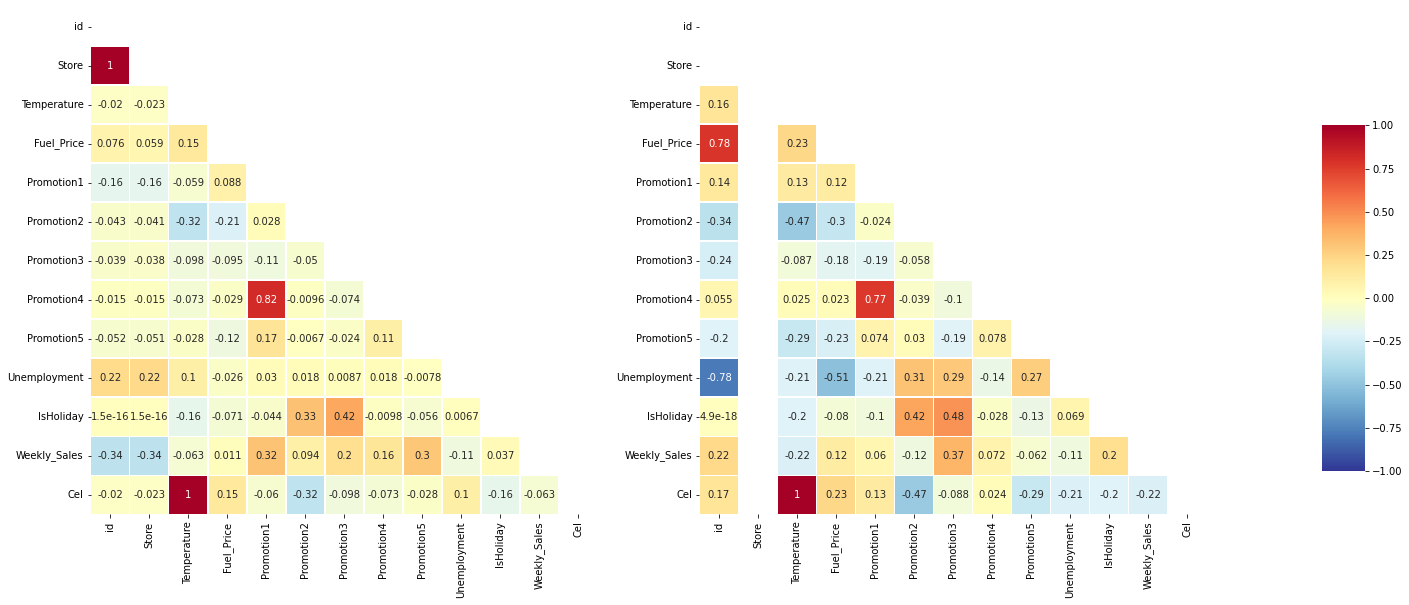

In [24]:
fig,ax = plt.subplots(1,2,figsize=(20,16))
cbar_ax = fig.add_axes([0.98, 0.32,0.03, 0.3])
#  가로와 세로의 위치 위? 넓이와  길이??

heat_table_1 = train.corr()
mask_1 = np.zeros_like(heat_table_1)
mask_1[np.triu_indices_from(mask_1)] = True

heat_table_2 = train[train.Store == 1].corr()
mask_2 = np.zeros_like(heat_table_2)
mask_2[np.triu_indices_from(mask_2)] = True


sns.heatmap(heat_table_1,mask =mask_2,
            annot = True,square=True,
            vmax=1,vmin=-1,linewidths = 0.5,
            ax = ax[0],#cbar_kws={"shrink": .5},
            cbar_ax= cbar_ax, cmap = 'RdYlBu_r'
            )
sns.heatmap(heat_table_2,mask =mask_2,
            annot = True,square=True,
            vmax=1,vmin=-1,linewidths = 0.5,
            ax = ax[1],#cbar_kws={"shrink": .5},
             cbar_ax= cbar_ax ,cmap = 'RdYlBu_r'
            );

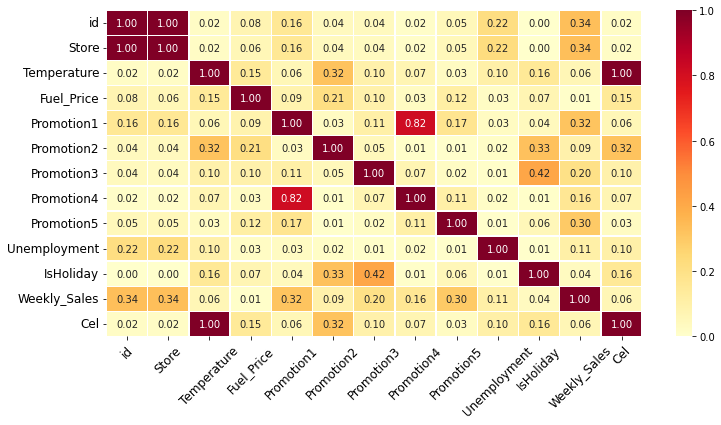

In [25]:
fig, ax = plt.subplots(figsize=(12,6))

sns.heatmap(train.corr().abs(), # 위에서 전처리한 데이터프레임
            annot = True, # 숫자 표시 여부
            ax = ax, # 히트맵을 그릴 격자
            linewidths = 0.4, # 선의 굵기
            linecolor = 'white', # 선의 색깔
            fmt = '.2f', # 소수점 포맷팅 형태
            cmap = 'YlOrRd') # colormap 형태

plt.xticks(rotation=45, size = 12)
plt.yticks(size=12) 
plt.show()

In [26]:
#promotion1과 4는 꽤 명확한 상관관계가 잇는 것으로 보임
#year와 Fuel_Price(연료값)도 상관관계가 존재하는데 아무래도 시간이 갈수록 연료값이 올라가서

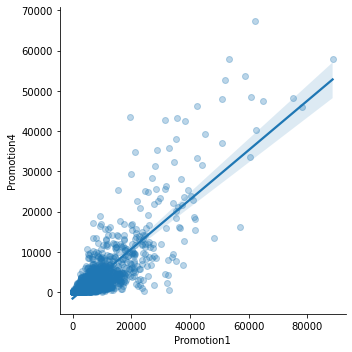

In [27]:
#대표적으로 위에서 언급한 1과 4를 보면 괘 높은 상관관계를 확인
sns.lmplot(x='Promotion1',y='Promotion4',data=train,scatter_kws={'alpha':0.3})

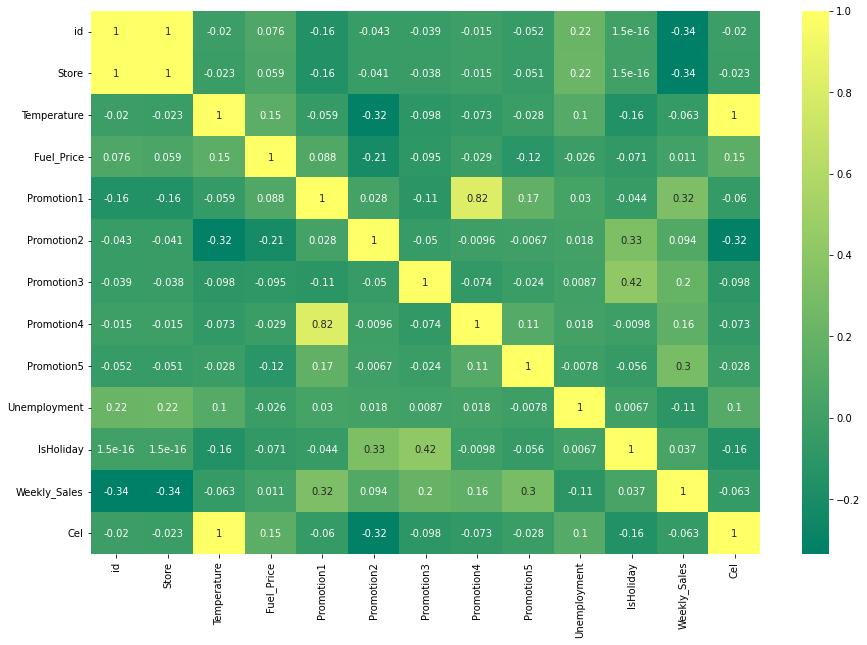

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),annot=True,cmap='summer');

### 날짜별 상관관계

In [29]:
train["Year"] = train["Date"].dt.year
test["Year"] = test["Date"].dt.year

train["Month"] = train["Date"].dt.month
test["Month"] = test["Date"].dt.month

train["Day"] = train["Date"].dt.day
test["Day"] = test["Date"].dt.day

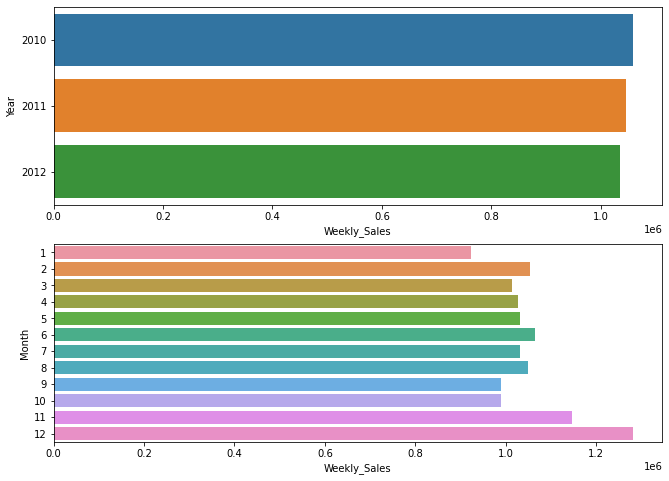

In [30]:
fig = plt.figure(figsize=(24,8))
gs = gridspec.GridSpec(nrows = 2, ncols = 2)
                      # ,height_ratios=[2, 2],width_ratios=[5, 5] )

fig.subplots_adjust(wspace=.2,hspace=.2)
ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[1, 0])

year =train.groupby('Year')[['Weekly_Sales']].mean()
sns.barplot(data=year,x='Weekly_Sales',y=year.index,ax=ax0,orient = 'horizontal')


month =train.groupby('Month')[['Weekly_Sales']].mean()
sns.barplot(data=month,x='Weekly_Sales',y=month.index,ax=ax1,orient = 'horizontal')

In [31]:
# 2010년도가 좀더 매출액 평균이 많긴하지만(제가 아직 발견하지 못한 것 일수도 있지만 ) 현재로써는 이것이 어떤 중요한, 유의성이 있는 정보라 보긴 아직 힘들것 같습니다,

# 달 기준으로 보면 아무래도 11,12월매출액 평균이 많은것으로 확인확인 가능한데, 아무래도 연말 그런것으로 추측

# 또 처음 표에 기온 단위를 화씨 기준으로 되어있어서 화씨 기준나라를 찾아봤는데 대표적으로 미국, 유럽등이 있엇습니다, 
#이걸 뭐 대표적으로 미국이라 생각하고 공휴일(IsHoliday) 정보도 잇겠다, 미국 달력 맞춰가면서 좀 더 정교한 예측이 가능할 수도? 잇겠다 생각은 했지만. 
#어디까지나 미국이란 나라라는 예측이 맞아야 했기 때문에 가능한 일이기 때문에 이 일(day)에 대한 정보도 막 종요한 유의미한 정보를 주기는 어려울것 같다고 생각이 듭니다.

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            6255 non-null   int64         
 1   Store         6255 non-null   int64         
 2   Date          6255 non-null   datetime64[ns]
 3   Temperature   6255 non-null   float64       
 4   Fuel_Price    6255 non-null   float64       
 5   Promotion1    2102 non-null   float64       
 6   Promotion2    1592 non-null   float64       
 7   Promotion3    1885 non-null   float64       
 8   Promotion4    1819 non-null   float64       
 9   Promotion5    2115 non-null   float64       
 10  Unemployment  6255 non-null   float64       
 11  IsHoliday     6255 non-null   bool          
 12  Weekly_Sales  6255 non-null   float64       
 13  Cel           6255 non-null   float64       
 14  Year          6255 non-null   int64         
 15  Month         6255 non-null   int64   

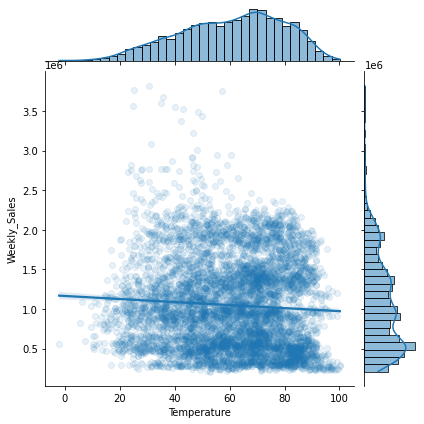

In [33]:
sns.jointplot(x=train['Temperature'],y=train['Weekly_Sales'],kind='reg',data=train,scatter_kws={'alpha':0.1});
#매출과 온도는 크게 관련이 없음

### 연도별 매장 매출 추이

In [34]:
# max_sales = max(trainset.Weekly_Sales)

# fig = plt.figure(figsize=(30,60))

# for store in range(1,max(trainset.Store)+1):
#     storeset = trainset[trainset.Store==store]
#     storeset_2010 = storeset[storeset.Year==2010]
#     storeset_2011 = storeset[storeset.Year==2011]
#     storeset_2012 = storeset[storeset.Year==2012]
    
#     ax = fig.add_subplot(12, 4, store)
    
#     plt.title(f"store_{store}")
#     ax.plot(storeset_2010.Week, storeset_2010.Weekly_Sales, label="2010", alpha=0.3)
#     ax.plot(storeset_2011.Week, storeset_2011.Weekly_Sales, label="2011", alpha=0.3)
#     ax.plot(storeset_2012.Week, storeset_2012.Weekly_Sales, label="2012", color='r')
#     ax.legend()
#     plt.ylim(0, max_sales)
    
# plt.show()

### 지점별 매출비교

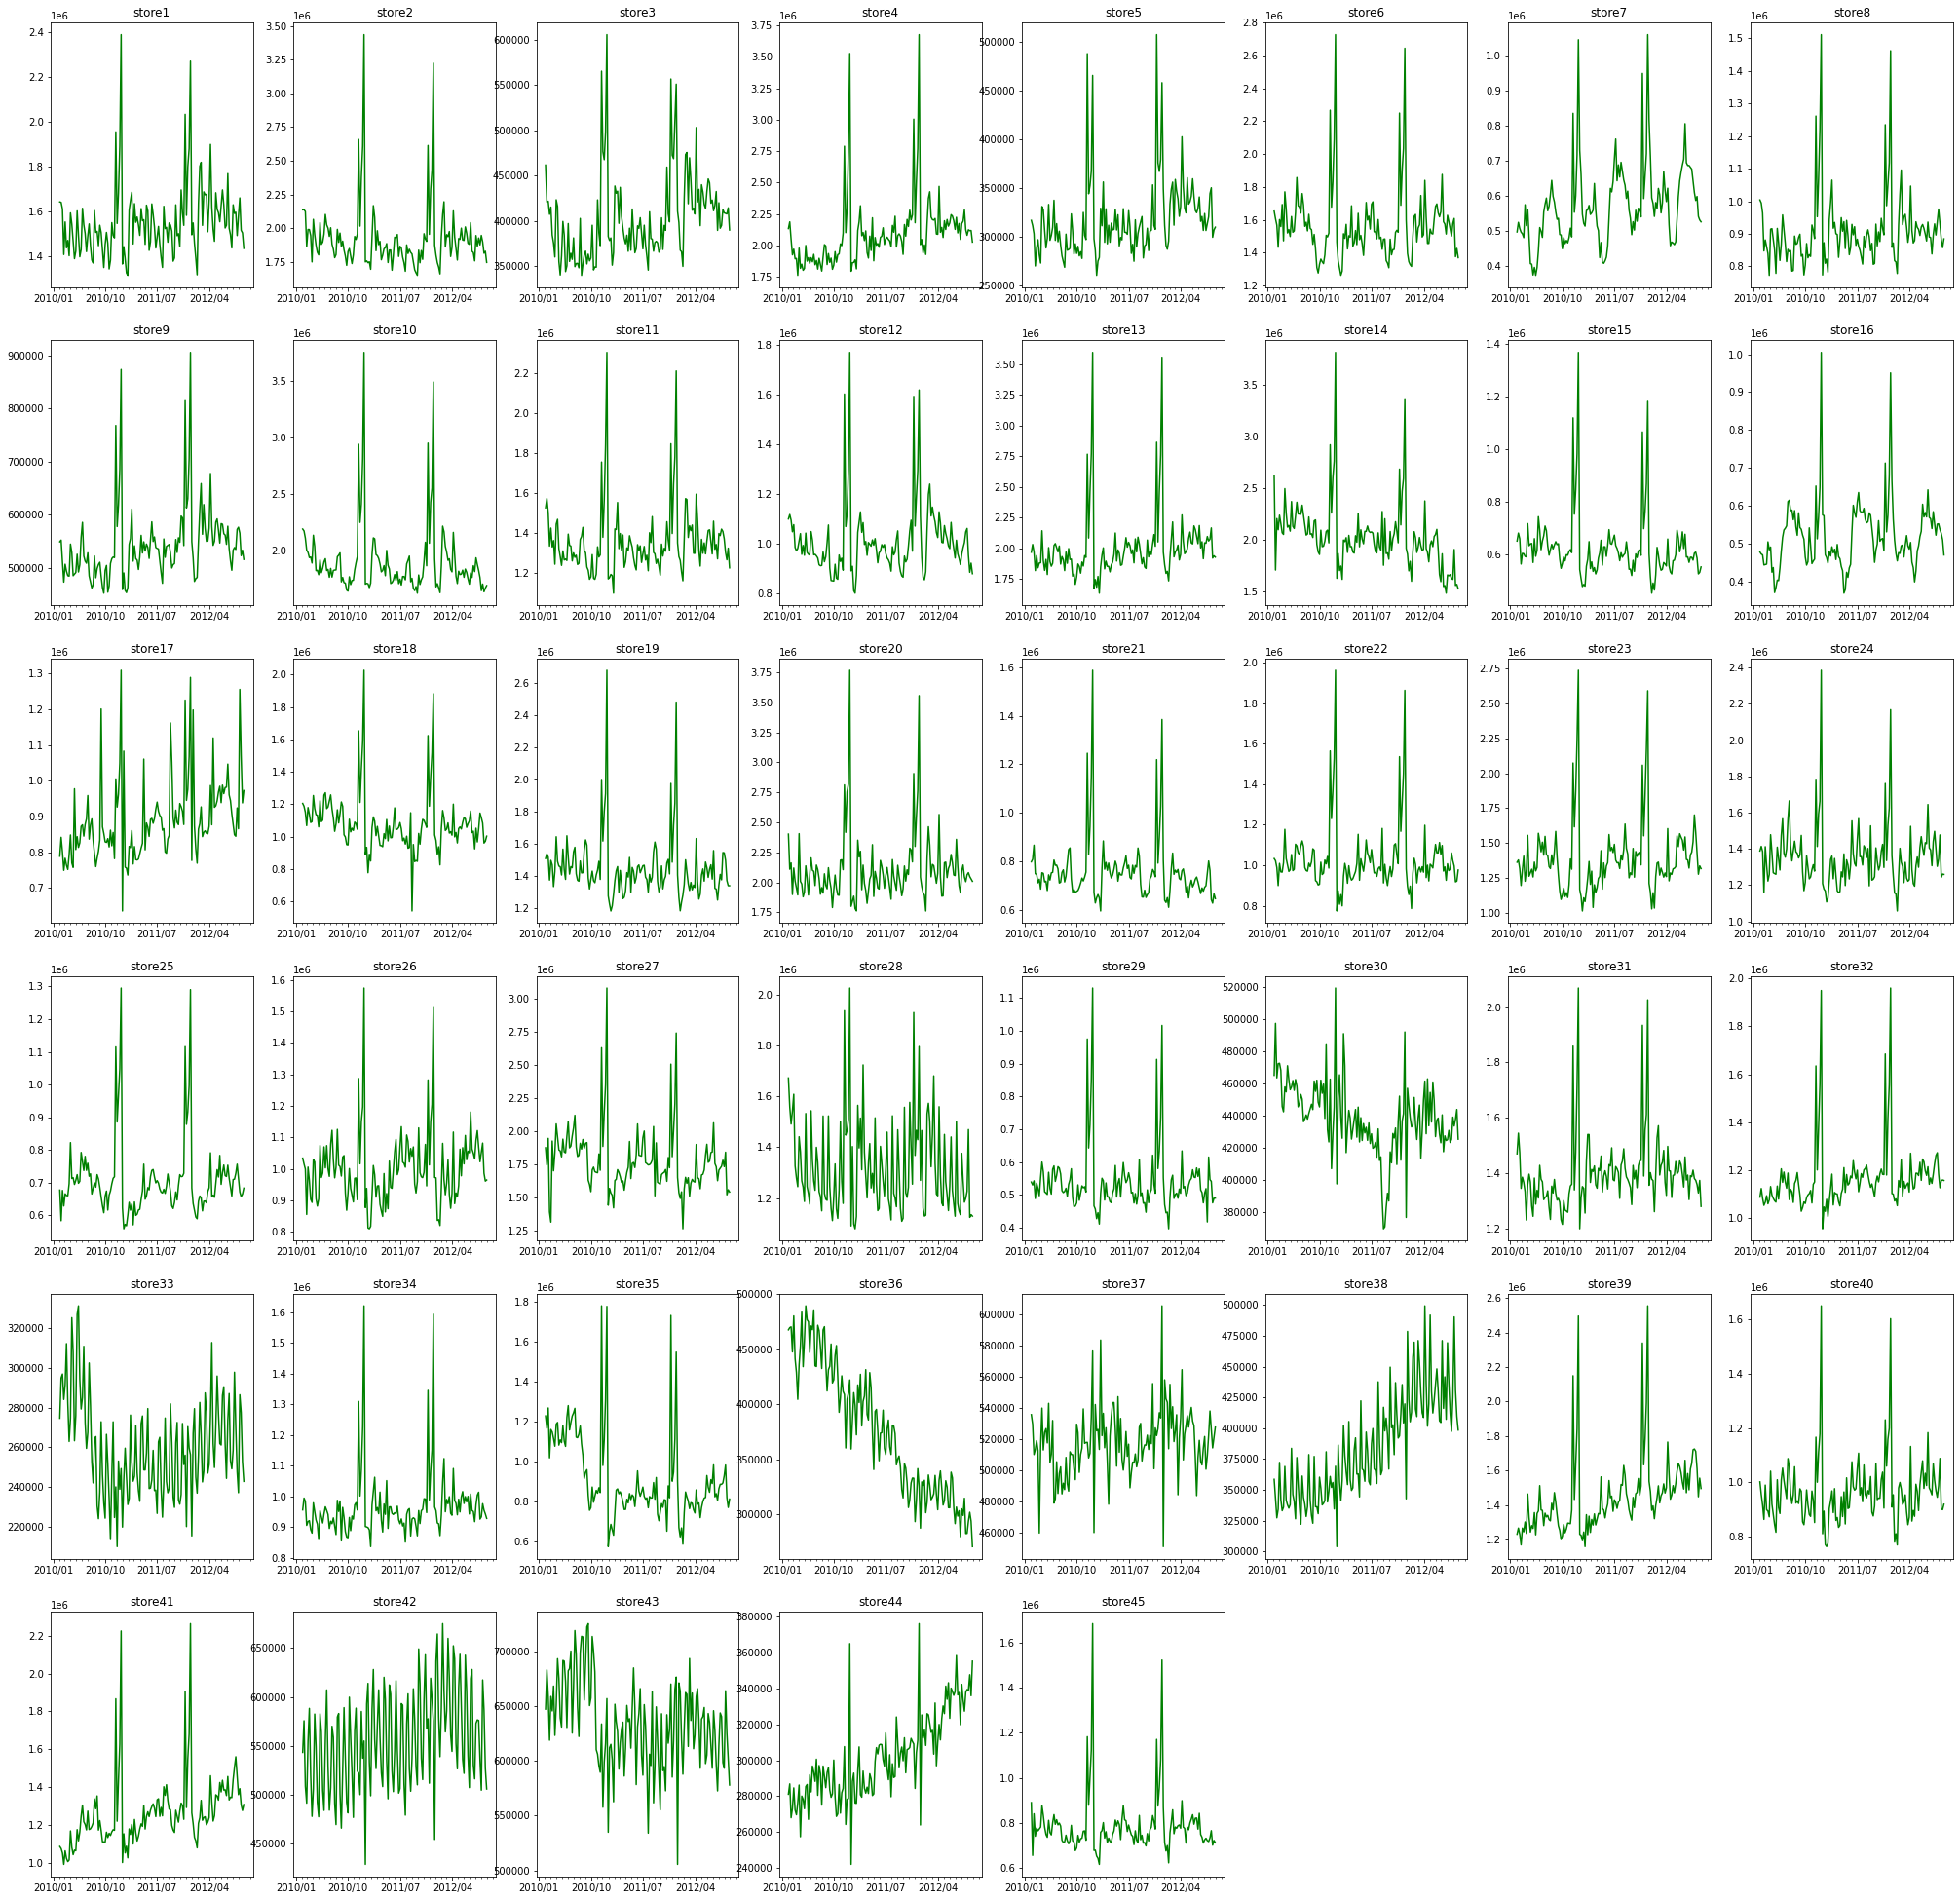

In [35]:
fig = plt.figure(figsize=(35,35))
for i in range(1,46):
  df = train.loc[train['Store']==i,['Date','Weekly_Sales']]
  ax = fig.add_subplot(6,8,i)
  ax.plot(df["Date"], df["Weekly_Sales"], color="green")
  ax.xaxis.set_major_locator(dates.MonthLocator(interval=9)) 
  ax.xaxis.set_major_formatter(dates.DateFormatter('%Y/%m')) 
  ax.xaxis.set_minor_locator(dates.MonthLocator(interval=1)) 
  ax.set_title('store{}'.format(i))
  #38 42 정도가 연관된 패턴이 있음

### 실업률

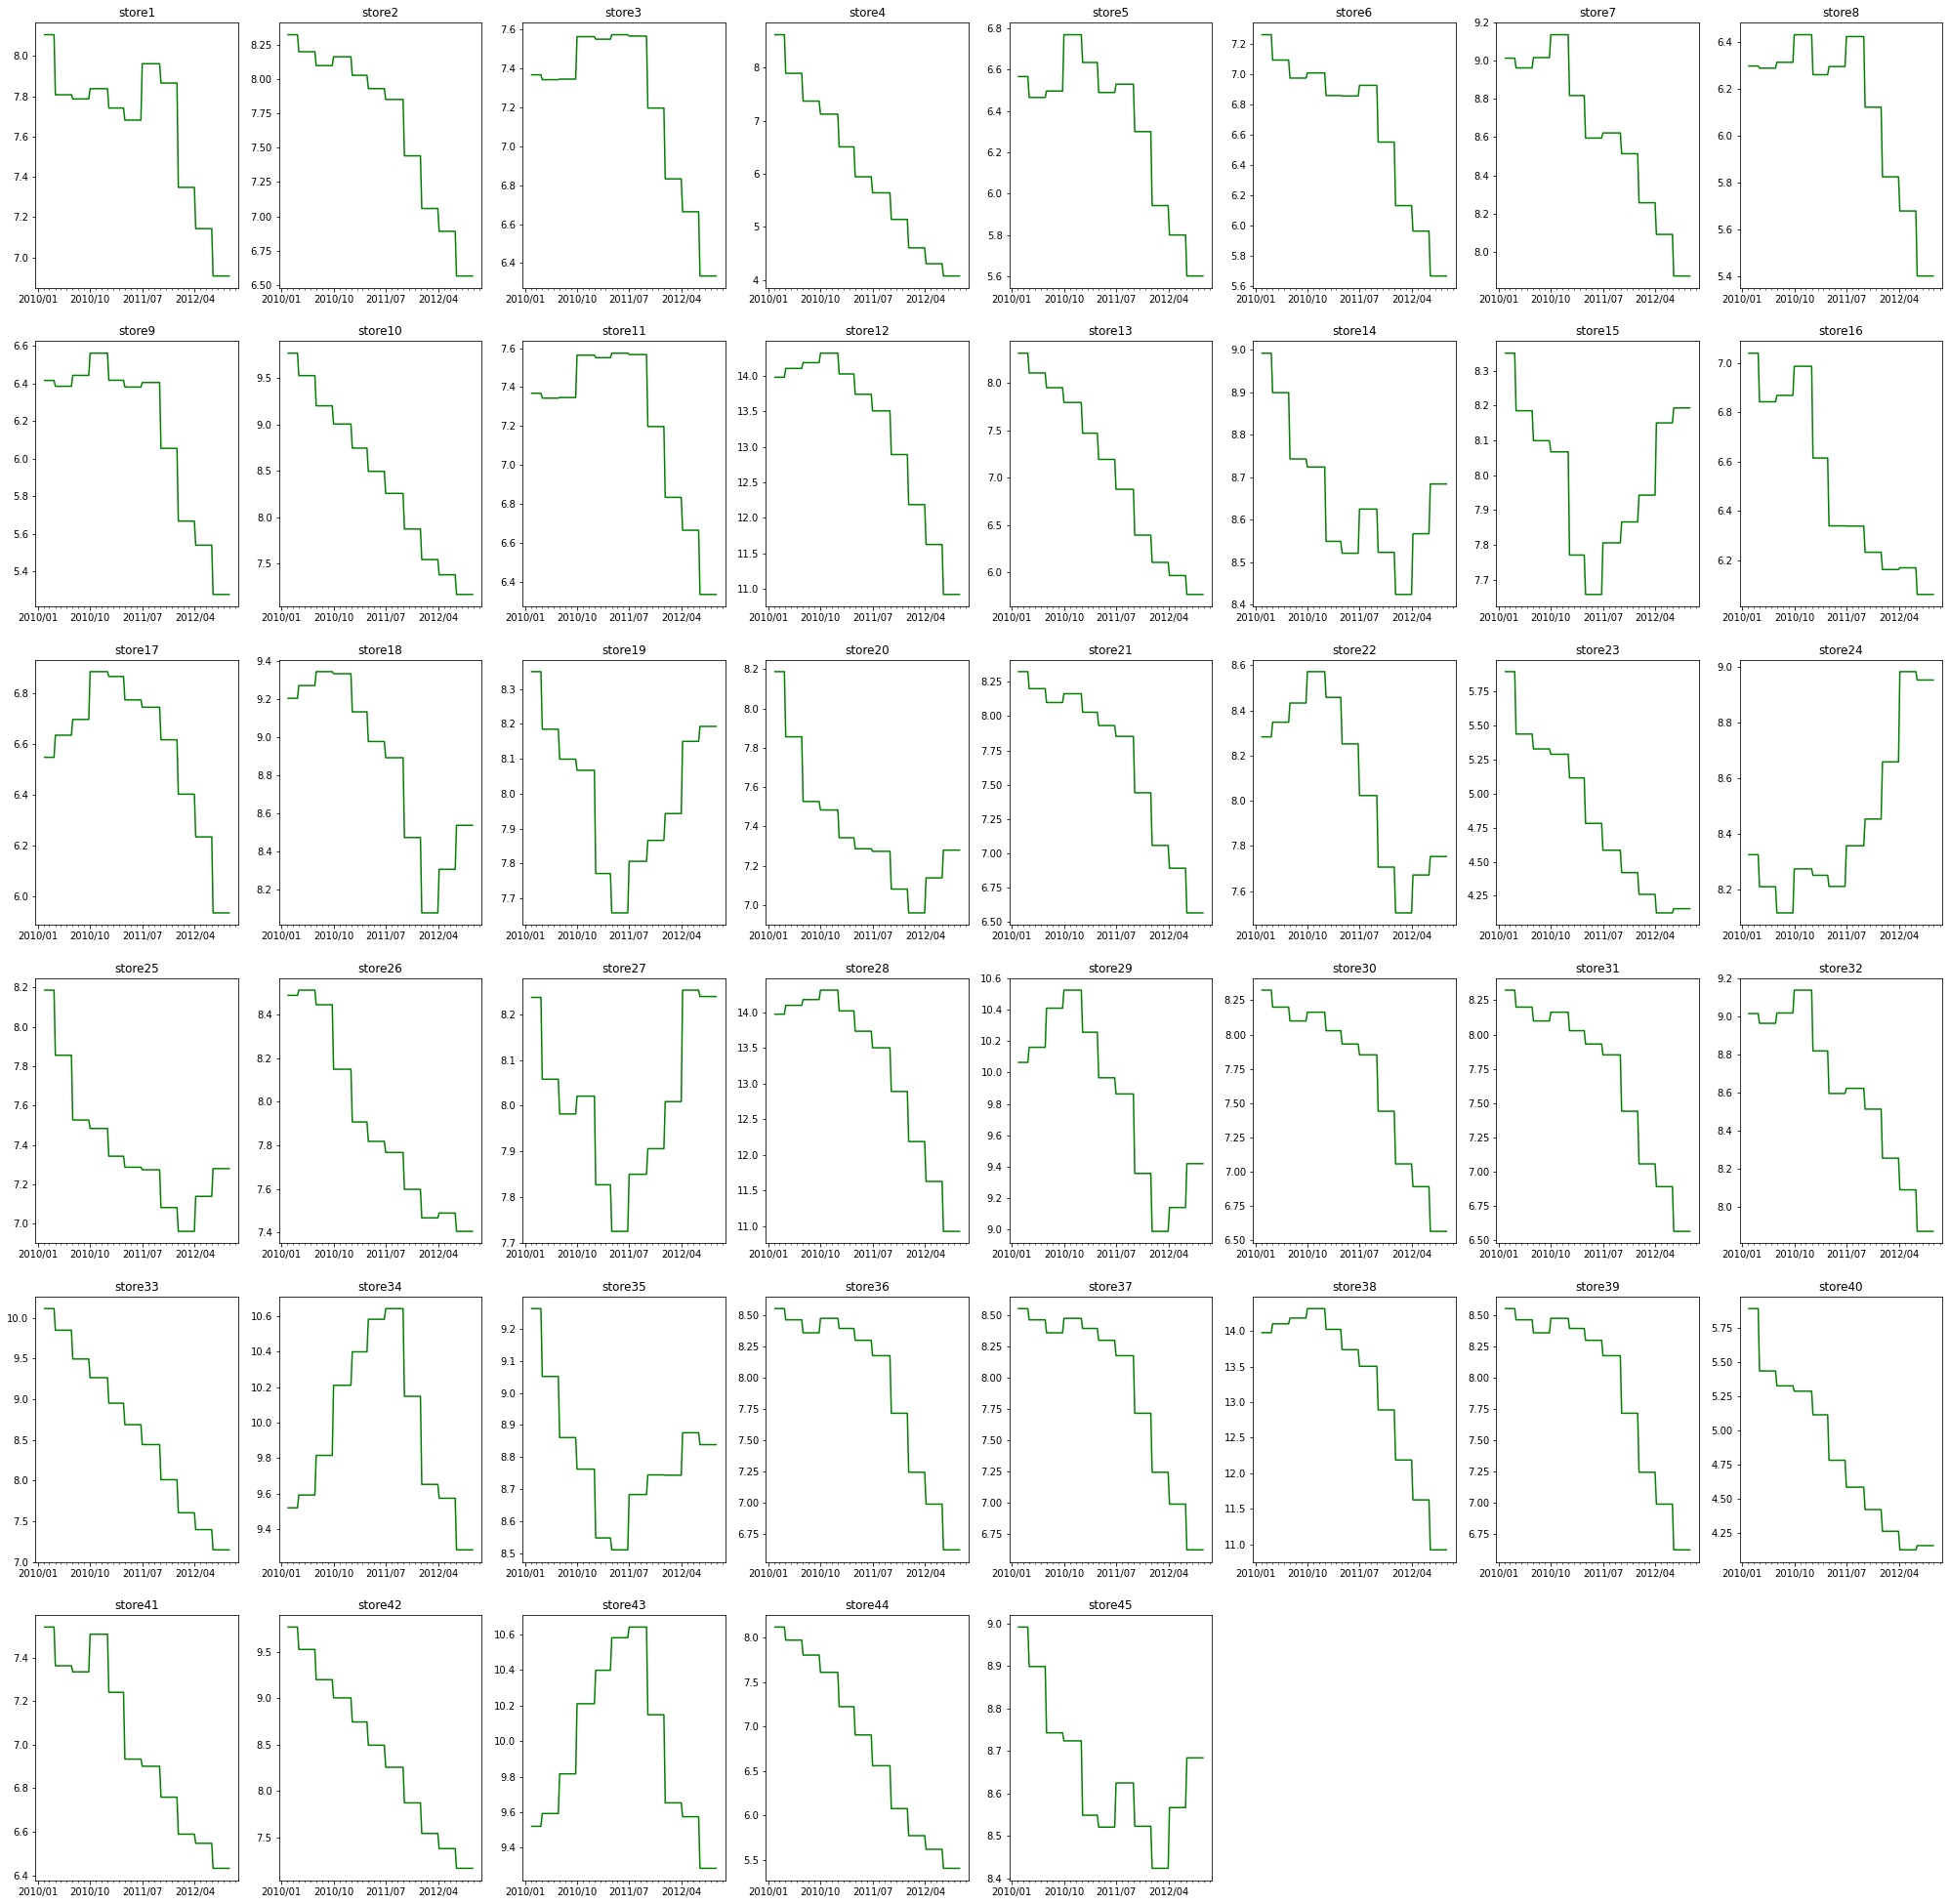

In [36]:
fig = plt.figure(figsize=(35,35))
for i in range(1,46):
  df = train.loc[train['Store']==i,['Date','Unemployment']]
  ax = fig.add_subplot(6,8,i)
  ax.plot(df["Date"], df["Unemployment"], color="green")
  ax.xaxis.set_major_locator(dates.MonthLocator(interval=9)) 
  ax.xaxis.set_major_formatter(dates.DateFormatter('%Y/%m')) 
  ax.xaxis.set_minor_locator(dates.MonthLocator(interval=1)) 
  ax.set_title('store{}'.format(i))
  #시간에 따라 실업률이 낮아짐

### 연료가격 

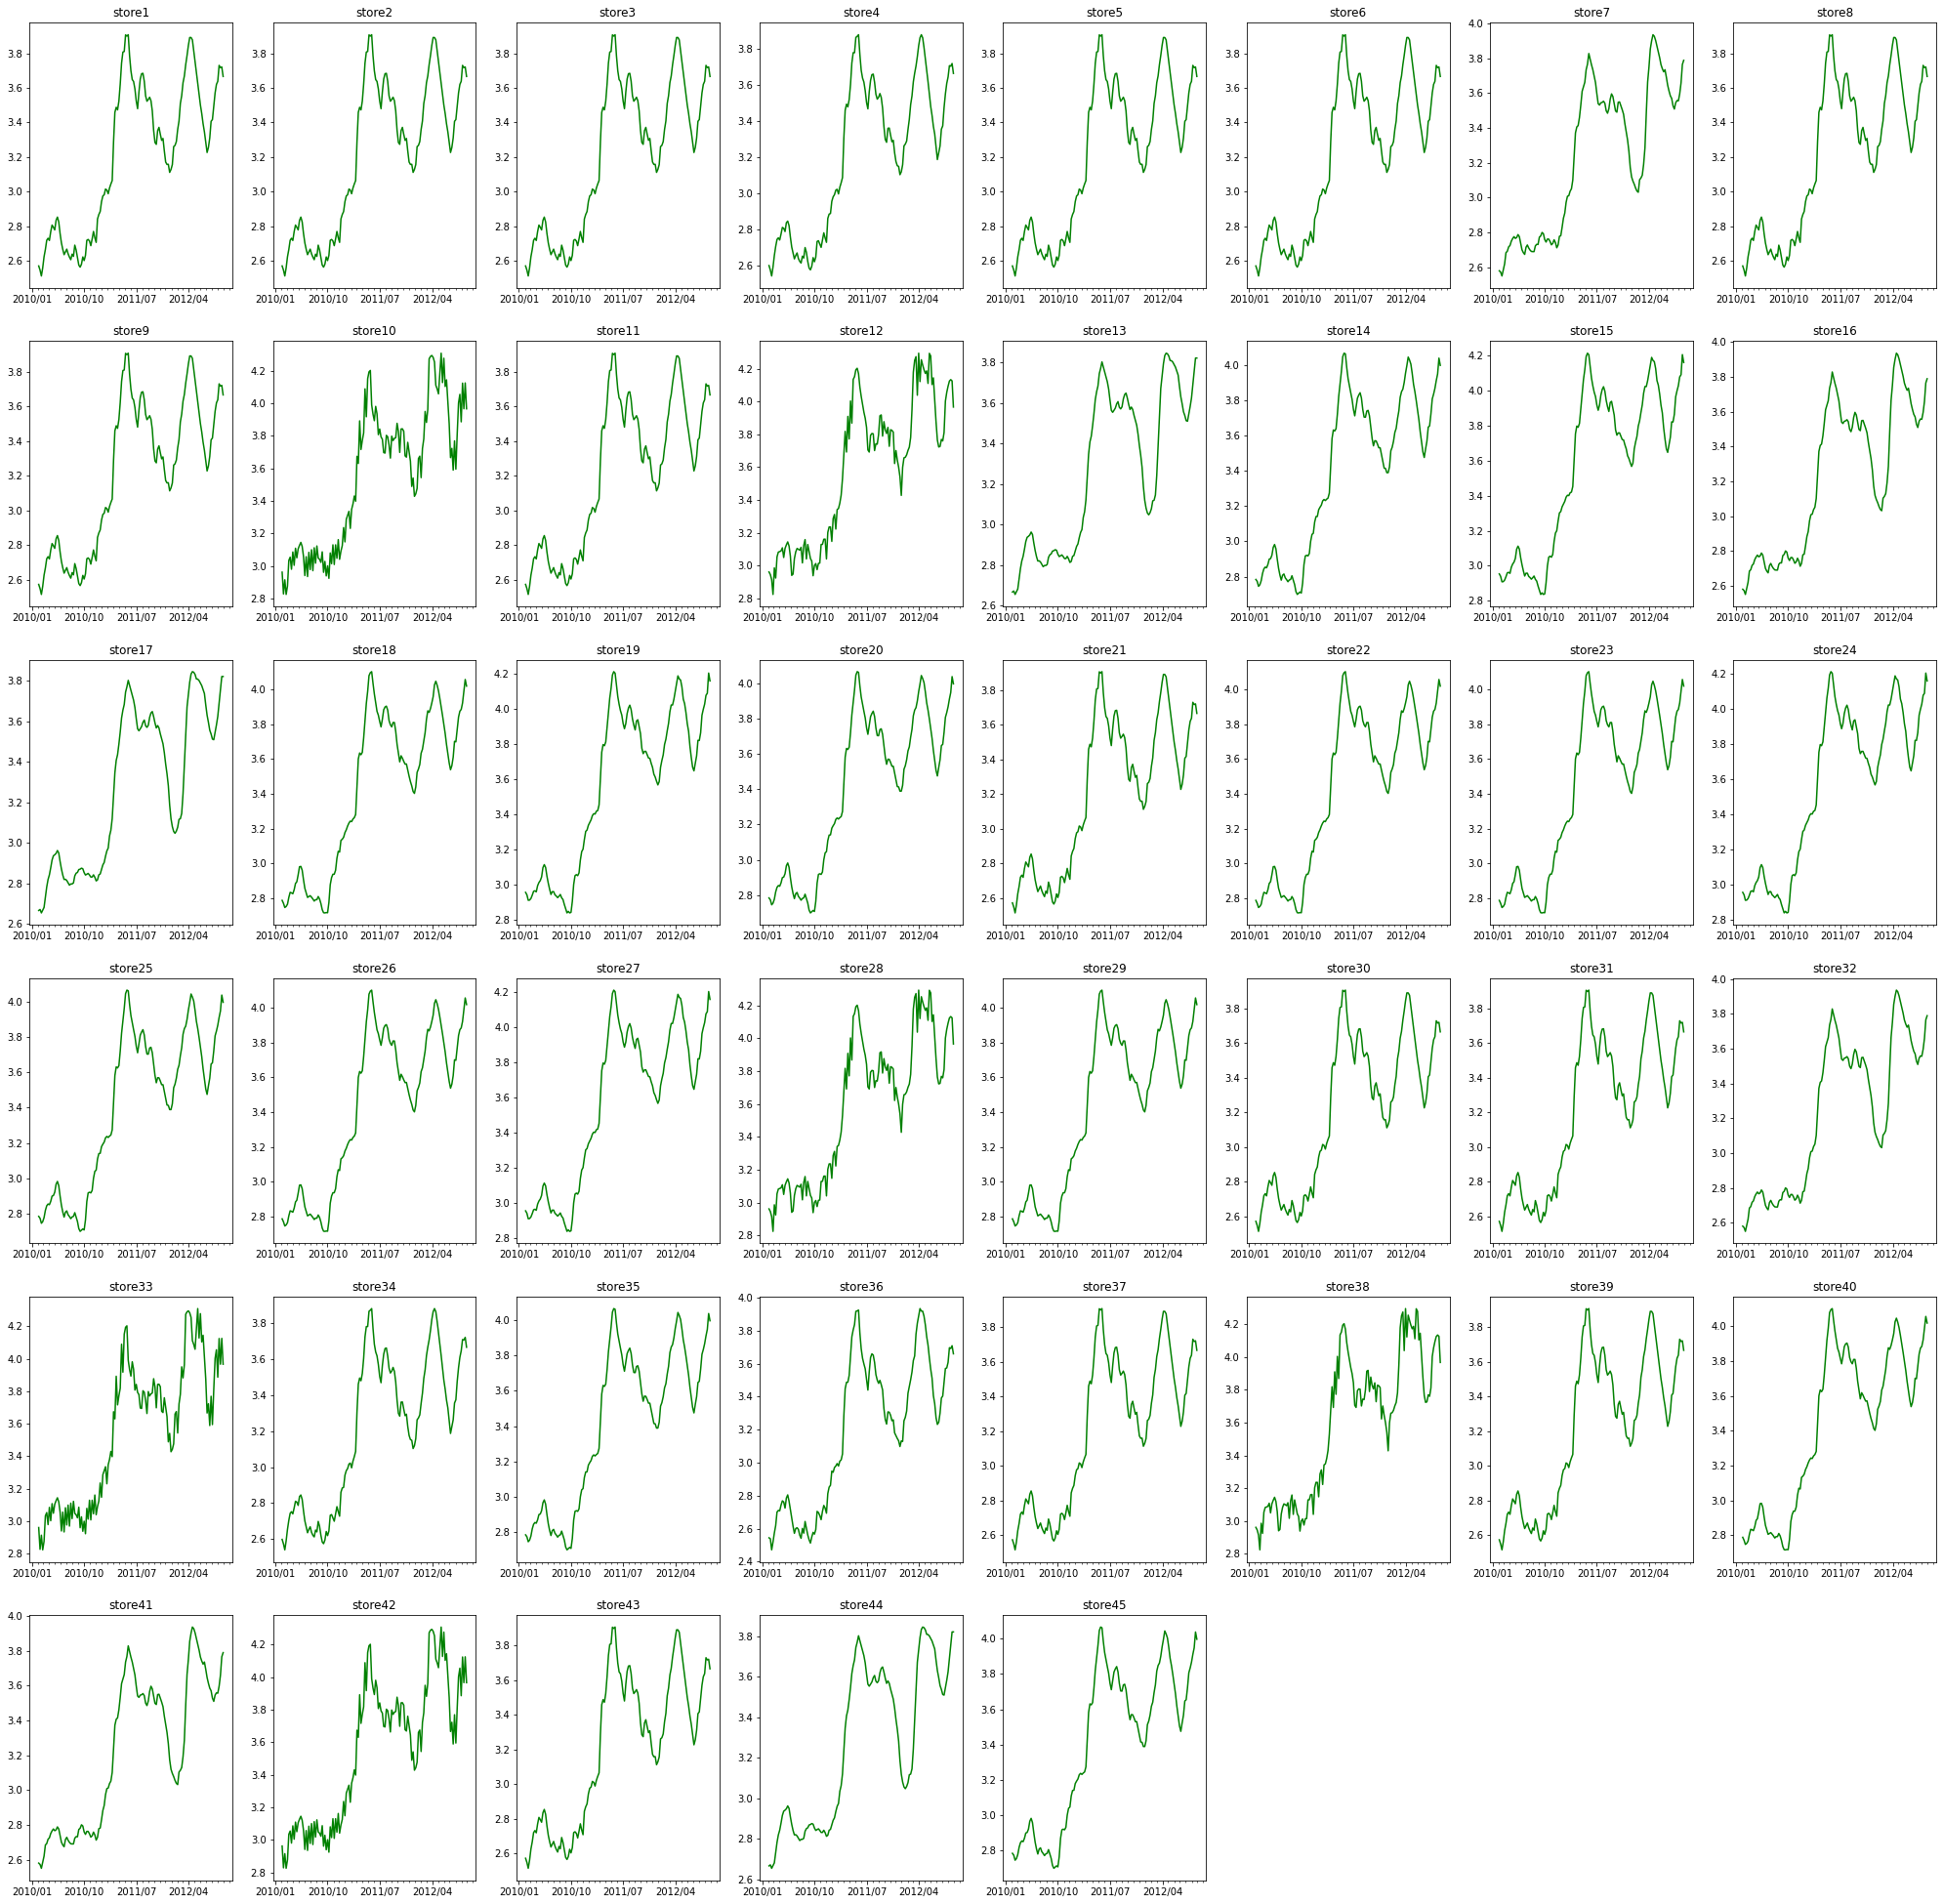

In [37]:
fig = plt.figure(figsize=(35,35))
for i in range(1,46):
  df = train.loc[train['Store']==i,['Date','Fuel_Price']]
  ax = fig.add_subplot(6,8,i)
  ax.plot(df["Date"], df["Fuel_Price"], color="green")
  ax.xaxis.set_major_locator(dates.MonthLocator(interval=9)) 
  ax.xaxis.set_major_formatter(dates.DateFormatter('%Y/%m')) 
  ax.xaxis.set_minor_locator(dates.MonthLocator(interval=1)) 
  ax.set_title('store{}'.format(i))

### 시각화 결론

In [38]:
#feature 선택을 잘해야 성능 개선에 진전이 있을 것 같다.
train.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Cel,Year,Month,Day
0,1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90,5.7,2010,2,5
1,2,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44,3.6,2010,2,12
2,3,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17,4.4,2010,2,19
3,4,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59,8.1,2010,2,26
4,5,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68,8.1,2010,3,5


In [39]:
#target 특성이 하나 더 있으므로 test feature 개수 +1 = train feature 개수
#13개씩 제거
print("train특성 개수:",len(list(train.columns)))
print("test특성 개수:",len(list(test.columns)))

train특성 개수: 17
test특성 개수: 16


In [40]:
# train특성 개수: 44
# test특성 개수: 43

## 4.데이터 전처리

#### 결측치 처리

In [41]:
#train = train.fillna(0)
#test = test.fillna(0)

### Promotion 결측치

프로모션은 2011-11-11월부터 기록

In [42]:
promotion_df = train.loc['2011-11-4'<train['Date']]
promotion_df.head(4)

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Cel,Year,Month,Day
92,93,1,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,7.866,False,1594938.89,15.1,2011,11,11
93,94,1,2011-11-18,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,7.866,False,1539483.70,16.8,2011,11,18
94,95,1,2011-11-25,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,7.866,True,2033320.66,15.6,2011,11,25
95,96,1,2011-12-02,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,7.866,False,1584083.95,9.4,2011,12,2


In [43]:
promotion_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2115 entries, 92 to 6254
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            2115 non-null   int64         
 1   Store         2115 non-null   int64         
 2   Date          2115 non-null   datetime64[ns]
 3   Temperature   2115 non-null   float64       
 4   Fuel_Price    2115 non-null   float64       
 5   Promotion1    2102 non-null   float64       
 6   Promotion2    1592 non-null   float64       
 7   Promotion3    1885 non-null   float64       
 8   Promotion4    1819 non-null   float64       
 9   Promotion5    2115 non-null   float64       
 10  Unemployment  2115 non-null   float64       
 11  IsHoliday     2115 non-null   bool          
 12  Weekly_Sales  2115 non-null   float64       
 13  Cel           2115 non-null   float64       
 14  Year          2115 non-null   int64         
 15  Month         2115 non-null   int64  

In [44]:
promotion_list = ['Promotion'+str(x) for x in range(1,6)]
promotion_list

['Promotion1', 'Promotion2', 'Promotion3', 'Promotion4', 'Promotion5']

In [45]:
for x in promotion_list:
  null = promotion_df[x].isnull().sum()
  print("{}칼럼은 전체 데이터 2070개 중 {}의 결측값존재".format(x,null))

Promotion1칼럼은 전체 데이터 2070개 중 13의 결측값존재
Promotion2칼럼은 전체 데이터 2070개 중 523의 결측값존재
Promotion3칼럼은 전체 데이터 2070개 중 230의 결측값존재
Promotion4칼럼은 전체 데이터 2070개 중 296의 결측값존재
Promotion5칼럼은 전체 데이터 2070개 중 0의 결측값존재


In [46]:
# 다행히 5는 결측값이 없고 1도 전제 데이터에 비해 많이 없는 것으로 확인
# 1같은경우는 최빈값, 평균값 ,선형보간법으로 채울수 있을 것으로 보여짐
# 선형보간법으로 채우기

In [47]:
promotion_df['Promotion1'] = promotion_df['Promotion1'].interpolate(method='values')

In [48]:
promotion_df.loc[(train['Promotion2'].isnull())  & (train['Promotion3'].isnull())  & (train['Promotion4'].isnull())  ]

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Cel,Year,Month,Day
4125,4126,30,2011-11-25,56.43,3.236,19.97,NaN,NaN,NaN,477.74,7.441,True,452163.93,13.6,2011,11,25
4141,4142,30,2012-03-16,63.39,3.734,301.14,NaN,NaN,NaN,2536.55,7.057,False,413617.45,17.4,2012,3,16
4150,4151,30,2012-05-18,72.42,3.630,57.13,NaN,NaN,NaN,857.91,6.891,False,460945.14,22.5,2012,5,18
4151,4152,30,2012-05-25,79.49,3.561,175.64,NaN,NaN,NaN,2534.54,6.891,False,449355.91,26.4,2012,5,25
4152,4153,30,2012-06-01,79.24,3.501,553.39,NaN,NaN,NaN,7048.24,6.891,False,427021.18,26.2,2012,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6097,6098,44,2012-05-25,62.39,3.801,63.04,NaN,NaN,NaN,419.93,5.621,False,343268.29,16.9,2012,5,25
6098,6099,44,2012-06-01,61.11,3.788,375.61,NaN,NaN,NaN,686.90,5.621,False,323410.94,16.2,2012,6,1
6102,6103,44,2012-06-29,82.00,3.681,174.37,NaN,NaN,NaN,1114.79,5.621,False,338386.08,27.8,2012,6,29
6114,6115,44,2012-09-21,67.96,3.821,57.17,NaN,NaN,NaN,854.46,5.407,False,336017.60,20.0,2012,9,21


#### promotin 2,3,4의 결측값 채우기

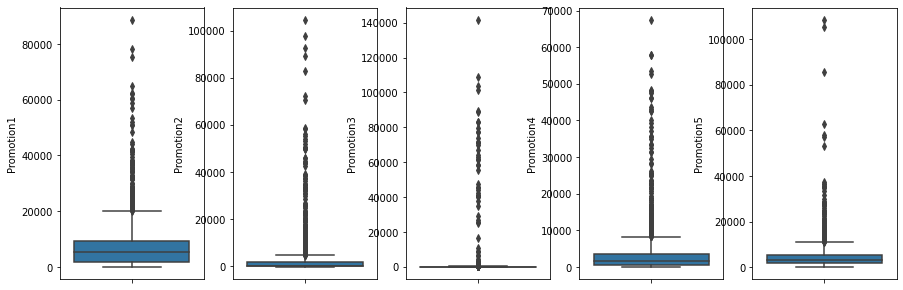

In [49]:
fig,ax = plt.subplots(1,5,figsize=(15,5))
for i,feature in enumerate(promotion_list):
  sns.boxplot(y =feature, data=promotion_df,ax=ax[i])

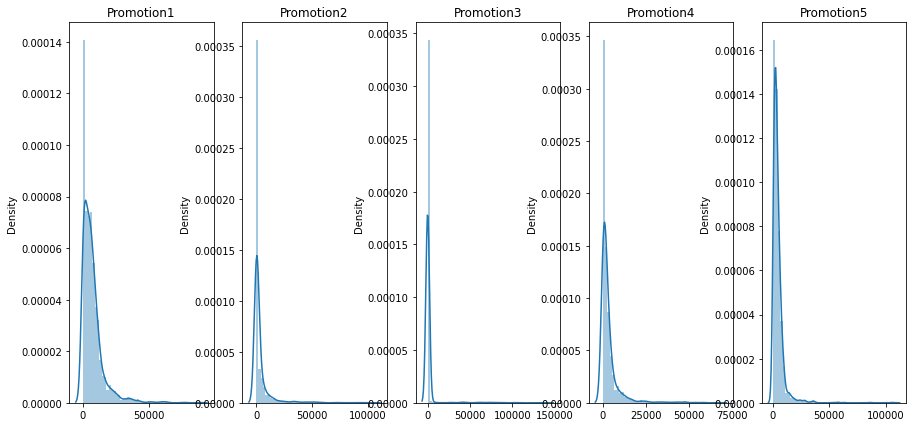

In [50]:
fig,ax = plt.subplots(1,5,figsize=(15,7))
for i,feature in enumerate(promotion_list):
  #sns.kdeplot(x =feature, data=df,ax=ax[i])
  sns.distplot(x =promotion_df[feature], ax=ax[i],kde=True);
  ax[i].set_title(feature)
# 전체적으로 분포가 고르지못하고 이상값, 극단값이 꽤 많은 것으로 보여짐
# 왜도와 첨도를 보면 (2,3,4는 아직 결측값이 있어서 측정불가).
# 왜도는 promotion1은 괜찮지만 5가 큰것을 볼수 있고 첨도는 말할것도 없이 정말 큼. (첨도가 크면 이상치가 많아서 좋지,않고(결측값을 평균값으로 채우면 곤란)
# 왜도가 크면 분포가 비대칭(이럴 경우 로그를 취하는 방법도 있음.)

In [51]:
from scipy.stats import skew, kurtosis
for x in promotion_list:
  ske = skew(promotion_df[x])
  kur =kurtosis(promotion_df[x])
  print("{}칼럼은  외도:{} 첨도:{} ".format(x,ske,kur))
  

Promotion1칼럼은  외도:3.280084200481312 첨도:17.03721506607358 
Promotion2칼럼은  외도:nan 첨도:nan 
Promotion3칼럼은  외도:nan 첨도:nan 
Promotion4칼럼은  외도:nan 첨도:nan 
Promotion5칼럼은  외도:8.173938348374172 첨도:106.55502674419223 


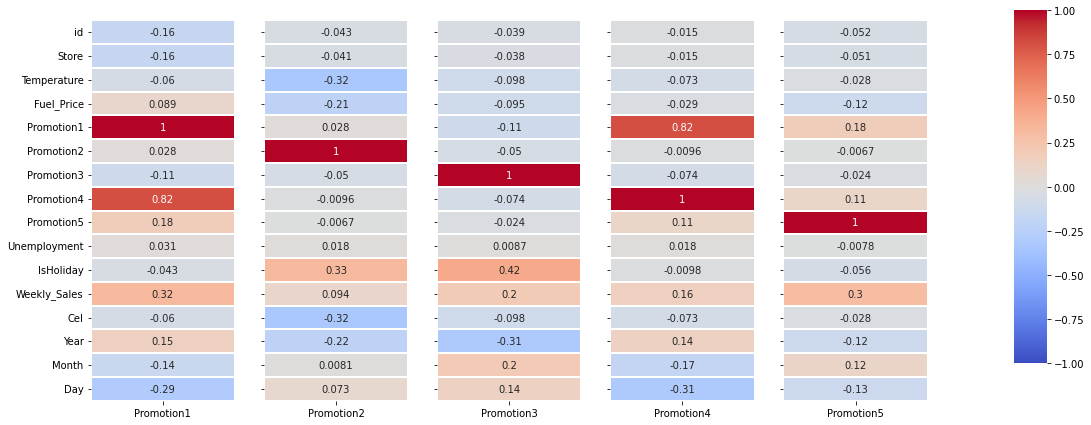

In [52]:
fig,ax = plt.subplots(1,5,figsize=(15,7),sharey=True)
cbar_ax = fig.add_axes([0.98, 0.20,0.03, 0.7])
for i,feature in enumerate(promotion_list):
  #sns.kdeplot(x =feature, data=df,ax=ax[i])
  sns.heatmap(promotion_df.corr()[[feature]],cmap ='coolwarm',vmin=-1,vmax=1,annot=True,linewidth=1,ax=ax[i],cbar_ax= cbar_ax );

In [53]:
#선형보간법을 활용한 후에 나머지 결측치는 뒤에꺼와 관계가 있다고 생각하여 선형보간법 대신 bfill 메소드를 활용해 결측치를 대치
test = test.fillna(method='bfill')

In [54]:
test.isna().sum()

id              0
Store           0
Date            0
Temperature     0
Fuel_Price      0
Promotion1      0
Promotion2      0
Promotion3      0
Promotion4      0
Promotion5      0
Unemployment    0
IsHoliday       0
Cel             0
Year            0
Month           0
Day             0
dtype: int64

In [55]:
#test데이터는 2011년 11월 11일 이후 Date를 가지고 있으므로 선형보간법을 활용
#test = test.interpolate(method='values')
train.fillna(0, inplace = True)
test.fillna(0, inplace = True)

train['Promotion1'][train['Promotion1'] < 0] = 0
train['Promotion2'][train['Promotion2'] < 0] = 0
train['Promotion3'][train['Promotion3'] < 0] = 0
train['Promotion4'][train['Promotion4'] < 0] = 0
train['Promotion5'][train['Promotion5'] < 0] = 0

test['Promotion1'][test['Promotion1'] < 0] = 0
test['Promotion2'][test['Promotion2'] < 0] = 0
test['Promotion3'][test['Promotion3'] < 0] = 0
test['Promotion4'][test['Promotion4'] < 0] = 0
test['Promotion5'][test['Promotion5'] < 0] = 0


train['Promotion1'] = np.log1p(train['Promotion1'])
train['Promotion2'] = np.log1p(train['Promotion2'])
train['Promotion3'] = np.log1p(train['Promotion3'])
train['Promotion4'] = np.log1p(train['Promotion4'])
train['Promotion5'] = np.log1p(train['Promotion5'])

test['Promotion1'] = np.log1p(test['Promotion1'])
test['Promotion2'] = np.log1p(test['Promotion2'])
test['Promotion3'] = np.log1p(test['Promotion3'])
test['Promotion4'] = np.log1p(test['Promotion4'])
test['Promotion5'] = np.log1p(test['Promotion5'])

In [56]:
test.isna().sum()

id              0
Store           0
Date            0
Temperature     0
Fuel_Price      0
Promotion1      0
Promotion2      0
Promotion3      0
Promotion4      0
Promotion5      0
Unemployment    0
IsHoliday       0
Cel             0
Year            0
Month           0
Day             0
dtype: int64

### Date 전처리

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            6255 non-null   int64         
 1   Store         6255 non-null   int64         
 2   Date          6255 non-null   datetime64[ns]
 3   Temperature   6255 non-null   float64       
 4   Fuel_Price    6255 non-null   float64       
 5   Promotion1    6255 non-null   float64       
 6   Promotion2    6255 non-null   float64       
 7   Promotion3    6255 non-null   float64       
 8   Promotion4    6255 non-null   float64       
 9   Promotion5    6255 non-null   float64       
 10  Unemployment  6255 non-null   float64       
 11  IsHoliday     6255 non-null   bool          
 12  Weekly_Sales  6255 non-null   float64       
 13  Cel           6255 non-null   float64       
 14  Year          6255 non-null   int64         
 15  Month         6255 non-null   int64   

In [58]:
# Date 칼럼에서 년도, 월, 일 정보를 숫자 형태로 반환하는 함수를 작성합니다.
def date_encoder(date):
    day, month, year = map(int, date.split('/'))
    return day, month, year

# # 이 함수를 Date 칼럼에 적용하여 Day, Month, Year 칼럼을 생성합니다.
# train['Day'] = train['Date'].apply(lambda x: date_encoder(x)[0])
# train['Month'] = train['Date'].apply(lambda x: date_encoder(x)[1])
# train['Year'] = train['Date'].apply(lambda x: date_encoder(x)[2])

# # 결과를 확인합니다.
train.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Cel,Year,Month,Day
0,1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,8.106,False,1643690.90,5.7,2010,2,5
1,2,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,8.106,True,1641957.44,3.6,2010,2,12
2,3,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,8.106,False,1611968.17,4.4,2010,2,19
3,4,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,8.106,False,1409727.59,8.1,2010,2,26
4,5,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,8.106,False,1554806.68,8.1,2010,3,5


In [59]:
#학습에 더이상 필요 없는 feature 제거
# 주간 데이터에서 일(Day)에 대한 데이터는 정보를 오염시킬 우려 ->Day 칼럼을 제거
train.drop(columns=['id','Temperature', 'Fuel_Price','Unemployment', 'Month','Day'], inplace=True) 
test.drop(columns=['id','Temperature', 'Fuel_Price','Unemployment', 'Month','Day'], inplace=True)

### 3. IsHoliday 전처리 정규화작업

정규화(Normalization)란 변수의 범위를  [0,1]  사이로 옮기는 작업

In [60]:
# IsHoliday 칼럼의 값을 숫자 형태로 반환하는 함수 작성
#bool data to one hot encoding
def holiday_to_number(isholiday):
    if isholiday == True:
        number = 1
    else:
        number = 0
    return number

# 이 함수를 IsHoliday 칼럼에 적용한 NumberHoliday 칼럼을 만들어줍니다.
train['NumberHoliday'] = train['IsHoliday'].apply(holiday_to_number)
test['NumberHoliday'] = test['IsHoliday'].apply(holiday_to_number)

# 결과를 확인합니다.
train

,Store,Date,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,IsHoliday,Weekly_Sales,Cel,Year,NumberHoliday
0,1,2010-02-05,0.000000,0.000000,0.000000,0.000000,0.000000,False,1643690.90,5.7,2010,0
1,1,2010-02-12,0.000000,0.000000,0.000000,0.000000,0.000000,True,1641957.44,3.6,2010,1
2,1,2010-02-19,0.000000,0.000000,0.000000,0.000000,0.000000,False,1611968.17,4.4,2010,0
3,1,2010-02-26,0.000000,0.000000,0.000000,0.000000,0.000000,False,1409727.59,8.1,2010,0
4,1,2010-03-05,0.000000,0.000000,0.000000,0.000000,0.000000,False,1554806.68,8.1,2010,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6250,45,2012-08-31,10.070793,1.945910,4.542550,8.852137,8.292331,False,734297.87,23.9,2012,0
6251,45,2012-09-07,9.307962,2.624669,3.982109,7.526055,7.628858,True,766512.66,24.3,2012,1
6252,45,2012-09-14,9.342153,0.000000,1.667707,8.138191,8.569770,False,702238.27,19.9,2012,0
6253,45,2012-09-21,9.042300,4.535606,4.162626,7.773754,9.067786,False,723086.20,18.5,2012,0


##  5.Promotion Scaling

In [61]:
# 정규화를 위해 sklearn의 StandardScaler를 사용
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 학습용 데이터를 이용해 scaler를 학습
scaler.fit(train[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']])

# 학습된 scaler를 사용해 데이터를 변환
scaled = scaler.transform(train[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']])

# 변환된 값을 새로운 column에 할당
train[['Scaled_Promotion1','Scaled_Promotion2',
       'Scaled_Promotion3','Scaled_Promotion4',
       'Scaled_Promotion5']] = scaled

# 데이터를 확인합니다.
train

,Store,Date,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,IsHoliday,Weekly_Sales,Cel,Year,NumberHoliday,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5
0,1,2010-02-05,0.000000,0.000000,0.000000,0.000000,0.000000,False,1643690.90,5.7,2010,0,-0.689252,-0.511912,-0.524470,-0.611926,-0.708384
1,1,2010-02-12,0.000000,0.000000,0.000000,0.000000,0.000000,True,1641957.44,3.6,2010,1,-0.689252,-0.511912,-0.524470,-0.611926,-0.708384
2,1,2010-02-19,0.000000,0.000000,0.000000,0.000000,0.000000,False,1611968.17,4.4,2010,0,-0.689252,-0.511912,-0.524470,-0.611926,-0.708384
3,1,2010-02-26,0.000000,0.000000,0.000000,0.000000,0.000000,False,1409727.59,8.1,2010,0,-0.689252,-0.511912,-0.524470,-0.611926,-0.708384
4,1,2010-03-05,0.000000,0.000000,0.000000,0.000000,0.000000,False,1554806.68,8.1,2010,0,-0.689252,-0.511912,-0.524470,-0.611926,-0.708384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,45,2012-08-31,10.070793,1.945910,4.542550,8.852137,8.292331,False,734297.87,23.9,2012,0,1.870145,0.201139,1.788602,2.040919,1.457759
6251,45,2012-09-07,9.307962,2.624669,3.982109,7.526055,7.628858,True,766512.66,24.3,2012,1,1.676279,0.449861,1.503224,1.643513,1.284445
6252,45,2012-09-14,9.342153,0.000000,1.667707,8.138191,8.569770,False,702238.27,19.9,2012,0,1.684968,-0.511912,0.324728,1.826960,1.530232
6253,45,2012-09-21,9.042300,4.535606,4.162626,7.773754,9.067786,False,723086.20,18.5,2012,0,1.608764,1.150097,1.595144,1.717745,1.660325


In [62]:
#Scaling 완료
# Promotion 칼럼들을 제거
train = train.drop(columns=['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5'])

train

,Store,Date,IsHoliday,Weekly_Sales,Cel,Year,NumberHoliday,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5
0,1,2010-02-05,False,1643690.90,5.7,2010,0,-0.689252,-0.511912,-0.524470,-0.611926,-0.708384
1,1,2010-02-12,True,1641957.44,3.6,2010,1,-0.689252,-0.511912,-0.524470,-0.611926,-0.708384
2,1,2010-02-19,False,1611968.17,4.4,2010,0,-0.689252,-0.511912,-0.524470,-0.611926,-0.708384
3,1,2010-02-26,False,1409727.59,8.1,2010,0,-0.689252,-0.511912,-0.524470,-0.611926,-0.708384
4,1,2010-03-05,False,1554806.68,8.1,2010,0,-0.689252,-0.511912,-0.524470,-0.611926,-0.708384
...,...,...,...,...,...,...,...,...,...,...,...,...
6250,45,2012-08-31,False,734297.87,23.9,2012,0,1.870145,0.201139,1.788602,2.040919,1.457759
6251,45,2012-09-07,True,766512.66,24.3,2012,1,1.676279,0.449861,1.503224,1.643513,1.284445
6252,45,2012-09-14,False,702238.27,19.9,2012,0,1.684968,-0.511912,0.324728,1.826960,1.530232
6253,45,2012-09-21,False,723086.20,18.5,2012,0,1.608764,1.150097,1.595144,1.717745,1.660325


In [63]:
train.head()

,Store,Date,IsHoliday,Weekly_Sales,Cel,Year,NumberHoliday,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5
0,1,2010-02-05,False,1643690.90,5.7,2010,0,-0.689252,-0.511912,-0.52447,-0.611926,-0.708384
1,1,2010-02-12,True,1641957.44,3.6,2010,1,-0.689252,-0.511912,-0.52447,-0.611926,-0.708384
2,1,2010-02-19,False,1611968.17,4.4,2010,0,-0.689252,-0.511912,-0.52447,-0.611926,-0.708384
3,1,2010-02-26,False,1409727.59,8.1,2010,0,-0.689252,-0.511912,-0.52447,-0.611926,-0.708384
4,1,2010-03-05,False,1554806.68,8.1,2010,0,-0.689252,-0.511912,-0.52447,-0.611926,-0.708384


In [64]:
test.head()

,Store,Date,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,IsHoliday,Cel,Year,NumberHoliday
0,1,2012-10-05,8.997010,3.488903,2.955951,8.193796,8.196200,False,20.3,2012,0
1,1,2012-10-12,7.643569,3.488903,2.209373,6.402514,8.687349,False,17.2,2012,0
2,1,2012-10-19,6.857861,3.488903,1.780024,4.397531,7.746668,False,20.0,2012,0
3,1,2012-10-26,7.858196,3.488903,1.945910,6.964287,7.174732,False,20.6,2012,0
4,2,2012-10-05,8.705954,4.873440,2.401525,8.015780,8.256971,False,21.3,2012,0


In [65]:
#같은 내용을 test set에도 적용
# Date 컬럼 삭제 확인 
train = train.drop(columns=['Date'])
test = test.drop(columns=['Date'])

# Promotion Scaling
scaled = scaler.transform(test[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']])

test[['Scaled_Promotion1','Scaled_Promotion2',
       'Scaled_Promotion3','Scaled_Promotion4',
       'Scaled_Promotion5']] = scaled

test = test.drop(columns=['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5'])

# 최종 확인
test

,Store,IsHoliday,Cel,Year,NumberHoliday,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5
0,1,False,20.3,2012,0,1.597253,0.766547,0.980704,1.843624,1.432647
1,1,False,17.2,2012,0,1.253289,0.766547,0.600545,1.306806,1.560947
2,1,False,20.0,2012,0,1.053609,0.766547,0.381920,0.705944,1.315219
3,1,False,20.6,2012,0,1.307835,0.766547,0.466390,1.475160,1.165817
4,2,False,21.3,2012,0,1.523284,1.273892,0.698389,1.790276,1.448522
...,...,...,...,...,...,...,...,...,...,...
175,44,False,8.3,2012,0,0.246009,-0.041516,-0.176636,1.701831,0.892513
176,45,False,18.3,2012,0,1.477728,0.982741,0.996357,1.701831,1.318268
177,45,False,12.5,2012,0,1.236959,0.982741,0.588097,1.305292,1.457655
178,45,False,13.6,2012,0,1.243083,0.982741,0.203846,1.211317,1.208612


### 라벨인코딩 선형회귀 DNN

In [66]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
train['IsHoliday'] = le.fit_transform(train['IsHoliday'])
train.head(5)

,Store,IsHoliday,Weekly_Sales,Cel,Year,NumberHoliday,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5
0,1,0,1643690.90,5.7,2010,0,-0.689252,-0.511912,-0.52447,-0.611926,-0.708384
1,1,1,1641957.44,3.6,2010,1,-0.689252,-0.511912,-0.52447,-0.611926,-0.708384
2,1,0,1611968.17,4.4,2010,0,-0.689252,-0.511912,-0.52447,-0.611926,-0.708384
3,1,0,1409727.59,8.1,2010,0,-0.689252,-0.511912,-0.52447,-0.611926,-0.708384
4,1,0,1554806.68,8.1,2010,0,-0.689252,-0.511912,-0.52447,-0.611926,-0.708384


In [67]:
train['IsHoliday'] = train["IsHoliday"].astype(int)

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Store              6255 non-null   int64  
 1   IsHoliday          6255 non-null   int64  
 2   Weekly_Sales       6255 non-null   float64
 3   Cel                6255 non-null   float64
 4   Year               6255 non-null   int64  
 5   NumberHoliday      6255 non-null   int64  
 6   Scaled_Promotion1  6255 non-null   float64
 7   Scaled_Promotion2  6255 non-null   float64
 8   Scaled_Promotion3  6255 non-null   float64
 9   Scaled_Promotion4  6255 non-null   float64
 10  Scaled_Promotion5  6255 non-null   float64
dtypes: float64(7), int64(4)
memory usage: 537.7 KB


In [69]:
#x 독립변수 y 종속변수 
x = train.drop(['Weekly_Sales'], axis =1)
y = train['Weekly_Sales']

In [70]:
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.2f}".format(x)})
x = x.values
y = y.to_numpy()
print(x[0,:])
print()
print(y[0:5])

[1.00 0.00 5.70 2010.00 0.00 -0.69 -0.51 -0.52 -0.61 -0.71]

[1643690.90 1641957.44 1611968.17 1409727.59 1554806.68]


In [71]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)

x_train:  (5004, 10)
y_train:  (5004,)
x_test:  (1251, 10)
y_test:  (1251,)


## 선형 휘귀를 위해 Standard 스케일링

keras 
relu
mse

케라스 모델들은 입력 데이터와 라벨로 구성된 Numpy 배열 위에서 이루어짐

선형회귀모델을 사용해서 딥러닝을 구현한다는 뜻은 선형회귀 수식 Y = WX + B를 이용하여, X라는 입력자료와 Y라는 출력자료가 주어졌을 때 최적의 W,B를 구한다는 뜻

케라스 라이브러리는 알아서 최적의 W(Weight)와 B(Bias)를 찾아줌

출처: https://ebbnflow.tistory.com/120 [삶은 확률의 구름:티스토리]


In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
print(x_scaled[:1])
print("----------------")
print(x_test_scaled[:1])

[[-1.55 -0.28 0.91 1.34 -0.28 1.29 -0.52 -0.06 1.42 1.00]]
----------------
[[0.61 -0.28 1.81 0.08 -0.28 -0.69 -0.52 -0.53 -0.61 -0.71]]


In [73]:
#keras 모델만들기
from keras.models import Sequential 
from keras.layers import Dense 
from keras import optimizers 
import tensorflow as tf

model = Sequential()
model.add(Dense(64, input_dim = x_scaled.shape[1], activation = 'relu')) #input_dim = 1, 입력 차원이 1이라는 뜻이며 입력 노드가 한개
model.add(Dense(64,  activation = 'relu')) # 'relu' 는 은닉층으로 역전파를 통해 좋은 성능이 나오기 때문에 마지막 층이 아니고서야 거의 relu 를 이용
model.add(Dense(64,  activation = 'relu'))
model.add(Dense(64,  activation = 'relu'))
model.add(Dense(64,  activation = 'relu'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17,409
Trainable params: 17,409
Non-traina

### 모형적합 모델 학습

선형 모형에서 데이터에 대한 오차가 가장 적은 파라미터를 찾는다면, 데이터가 생성된 실제 패턴에 가까워질 것

경사하강법(gradient descent)은 파라미터를 더 손실이 적은 방향으로 개선해나가는 방법

In [74]:
#딥러닝 Optimization Algorithm (최적화 알고리즘) 모델 학습
#기울기 강하의 속도를 증가시키는 알고리즘
#가장 널리 쓰이는 손실 함수는 평균 제곱 오차(mean squared error, 이하 MSE)이다. 
#예측과 실제의 차이를 오차라고 한다. 이 오차를 모두 제곱한 다음에 평균 낸 것이 MSE
#MSE의 정의를 가만히 보면 분산과 똑같다는 것
optimizer = tf.keras.optimizers.RMSprop(0.01) 
model.compile(optimizer = optimizer , loss = 'mse', metrics = ['mean_absolute_error']) # 손실 최소화
model.fit(x_scaled,y_train, epochs = 785) # 독립(데이터), 종속(라벨), 785번 학습시키기
#loss값이 0에 가까워진 것을 볼 수 있다.

Epoch 1/785
157/157 [==============================] - 1s 2ms/step - loss: 332528779264.0000 - mean_absolute_error: 452091.8125
Epoch 2/785
157/157 [==============================] - 0s 2ms/step - loss: 255510970368.0000 - mean_absolute_error: 404874.5938
Epoch 3/785
157/157 [==============================] - 0s 2ms/step - loss: 254579654656.0000 - mean_absolute_error: 403029.5312
Epoch 4/785
157/157 [==============================] - 0s 2ms/step - loss: 256640073728.0000 - mean_absolute_error: 404955.1562
Epoch 5/785
157/157 [==============================] - 0s 2ms/step - loss: 253624057856.0000 - mean_absolute_error: 401418.0625
Epoch 6/785
157/157 [==============================] - 0s 2ms/step - loss: 253166092288.0000 - mean_absolute_error: 401706.0312
Epoch 7/785
157/157 [==============================] - 0s 2ms/step - loss: 251308097536.0000 - mean_absolute_error: 399503.0938
Epoch 8/785
157/157 [==============================] - 0s 2ms/step - loss: 251878850560.0000 - mean_abso

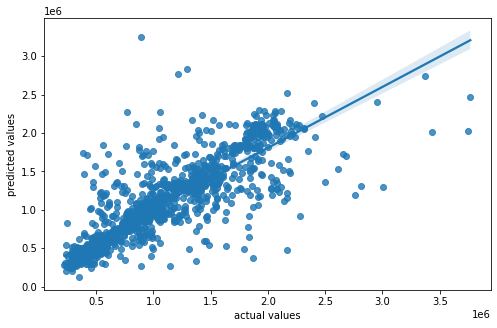

In [75]:
#선형회귀가 잘 그려짐
pred = model.predict(x_test_scaled)

plt.figure(figsize = (8,5))
sns.regplot(x=y_test, y = pred)
plt.xlabel("actual values")
plt.ylabel("predicted values")
plt.show()

## Test.csv : 테스트 데이터로 판매 예측

In [76]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
test['IsHoliday'] = le.fit_transform(test['IsHoliday'])
test.head(5)

,Store,IsHoliday,Cel,Year,NumberHoliday,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5
0,1,0,20.3,2012,0,1.597253,0.766547,0.980704,1.843624,1.432647
1,1,0,17.2,2012,0,1.253289,0.766547,0.600545,1.306806,1.560947
2,1,0,20.0,2012,0,1.053609,0.766547,0.381920,0.705944,1.315219
3,1,0,20.6,2012,0,1.307835,0.766547,0.466390,1.475160,1.165817
4,2,0,21.3,2012,0,1.523284,1.273892,0.698389,1.790276,1.448522


In [77]:
scaler = StandardScaler()
scaler.fit(x)
x_scaler = scaler.transform(x)

model.fit(x_scaler,y, epochs = 785 )


Epoch 1/785
196/196 [==============================] - 0s 2ms/step - loss: 49196007424.0000 - mean_absolute_error: 128179.5547
Epoch 2/785
196/196 [==============================] - 0s 2ms/step - loss: 44835958784.0000 - mean_absolute_error: 123749.5781
Epoch 3/785
196/196 [==============================] - 0s 2ms/step - loss: 43975880704.0000 - mean_absolute_error: 123510.8125
Epoch 4/785
196/196 [==============================] - 0s 2ms/step - loss: 44380348416.0000 - mean_absolute_error: 124557.8516
Epoch 5/785
196/196 [==============================] - 0s 2ms/step - loss: 42599243776.0000 - mean_absolute_error: 122788.5781
Epoch 6/785
196/196 [==============================] - 0s 2ms/step - loss: 43198332928.0000 - mean_absolute_error: 123305.4062
Epoch 7/785
196/196 [==============================] - 0s 2ms/step - loss: 41363447808.0000 - mean_absolute_error: 120799.8203
Epoch 8/785
196/196 [==============================] - 0s 2ms/step - loss: 43018067968.0000 - mean_absolute_err

In [78]:
score = model.evaluate(x_scaler,y, batch_size=128)

49/49 [==============================] - 0s 1ms/step - loss: 19553642496.0000 - mean_absolute_error: 83370.3984


In [79]:
x_train

array([[3.00, 0.00, 25.30, ..., -0.06, 1.42, 1.01],
       [23.00, 0.00, 2.00, ..., -0.52, -0.61, -0.71],
       [13.00, 0.00, 11.70, ..., -0.52, -0.61, -0.71],
       ...,
       [38.00, 1.00, 31.10, ..., -0.52, -0.61, -0.71],
       [39.00, 0.00, 17.80, ..., 0.55, 1.98, 1.76],
       [7.00, 0.00, 16.50, ..., -0.52, -0.61, -0.71]])

In [80]:
x_scaler

array([[-1.69, -0.28, -0.99, ..., -0.52, -0.61, -0.71],
       [-1.69, 3.59, -1.19, ..., -0.52, -0.61, -0.71],
       [-1.69, -0.28, -1.11, ..., -0.52, -0.61, -0.71],
       ...,
       [1.69, -0.28, 0.39, ..., 0.32, 1.83, 1.53],
       [1.69, -0.28, 0.25, ..., 1.60, 1.72, 1.66],
       [1.69, -0.28, 0.23, ..., -0.06, 1.60, 1.41]])

In [81]:
# 아 뭐가 뭐야ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
x_scaled

array([[-1.55, -0.28, 0.91, ..., -0.06, 1.42, 1.00],
       [-0.01, -0.28, -1.33, ..., -0.53, -0.61, -0.71],
       [-0.78, -0.28, -0.40, ..., -0.53, -0.61, -0.71],
       ...,
       [1.15, 3.61, 1.47, ..., -0.53, -0.61, -0.71],
       [1.23, -0.28, 0.19, ..., 0.54, 1.98, 1.75],
       [-1.24, -0.28, 0.07, ..., -0.53, -0.61, -0.71]])

In [82]:
y_test

array([1428993.33, 2057637.86, 573545.96, ..., 782256.66, 478503.06,
       1004749.41])

In [83]:
score = model.evaluate(x_test, y_test, batch_size=128)

10/10 [==============================] - 0s 2ms/step - loss: 94859953369513984.0000 - mean_absolute_error: 307659968.0000


In [84]:
#학습을 위해 train, test의 columns 개수 맞춰주기
print(len(list(train.columns)), len(list(test.columns)))

11 10


In [86]:
#print(model.predict(x_scaler)))
#print(model.predict([[15]]))

In [87]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Store              180 non-null    int64  
 1   IsHoliday          180 non-null    int64  
 2   Cel                180 non-null    float64
 3   Year               180 non-null    int64  
 4   NumberHoliday      180 non-null    int64  
 5   Scaled_Promotion1  180 non-null    float64
 6   Scaled_Promotion2  180 non-null    float64
 7   Scaled_Promotion3  180 non-null    float64
 8   Scaled_Promotion4  180 non-null    float64
 9   Scaled_Promotion5  180 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 14.2 KB


In [88]:
train

,Store,IsHoliday,Weekly_Sales,Cel,Year,NumberHoliday,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5
0,1,0,1643690.90,5.7,2010,0,-0.689252,-0.511912,-0.524470,-0.611926,-0.708384
1,1,1,1641957.44,3.6,2010,1,-0.689252,-0.511912,-0.524470,-0.611926,-0.708384
2,1,0,1611968.17,4.4,2010,0,-0.689252,-0.511912,-0.524470,-0.611926,-0.708384
3,1,0,1409727.59,8.1,2010,0,-0.689252,-0.511912,-0.524470,-0.611926,-0.708384
4,1,0,1554806.68,8.1,2010,0,-0.689252,-0.511912,-0.524470,-0.611926,-0.708384
...,...,...,...,...,...,...,...,...,...,...,...
6250,45,0,734297.87,23.9,2012,0,1.870145,0.201139,1.788602,2.040919,1.457759
6251,45,1,766512.66,24.3,2012,1,1.676279,0.449861,1.503224,1.643513,1.284445
6252,45,0,702238.27,19.9,2012,0,1.684968,-0.511912,0.324728,1.826960,1.530232
6253,45,0,723086.20,18.5,2012,0,1.608764,1.150097,1.595144,1.717745,1.660325


In [89]:
test.describe()

,Store,IsHoliday,Cel,Year,NumberHoliday,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5
count,180.0000,180.0,180.000000,180.0,180.0,180.000000,180.000000,180.000000,180.000000,180.000000
mean,23.0000,0.0,16.400556,2012.0,0.0,1.183030,0.753766,0.777653,1.274720,1.326453
std,13.0234,0.0,5.814560,0.0,0.0,0.404505,0.540727,0.635109,0.596817,0.235355
min,1.0000,0.0,4.100000,2012.0,0.0,0.028982,-0.511912,-0.519403,-0.552333,0.649681
25%,12.0000,0.0,12.300000,2012.0,0.0,1.032207,0.260901,0.294035,1.140021,1.166972
50%,23.0000,0.0,16.400000,2012.0,0.0,1.282980,0.950270,0.655588,1.401313,1.365604
75%,34.0000,0.0,21.325000,2012.0,0.0,1.475014,1.184064,1.188974,1.666121,1.487373
max,45.0000,0.0,29.500000,2012.0,0.0,1.781358,1.650594,2.290313,2.134397,1.810167


## 6.Modeling



### 원핫 인코딩

https://dacon.io/competitions/official/235942/codeshare/5759?page=1&dtype=recent

In [90]:
train = pd.get_dummies(train, columns = ['Store'])
test = pd.get_dummies(test, columns = ['Store'])
print(train.shape)
print(test.shape)
train.head()

(6255, 55)
(180, 54)


,IsHoliday,Weekly_Sales,Cel,Year,NumberHoliday,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,0,1643690.90,5.7,2010,0,-0.689252,-0.511912,-0.52447,-0.611926,-0.708384,...,0,0,0,0,0,0,0,0,0,0
1,1,1641957.44,3.6,2010,1,-0.689252,-0.511912,-0.52447,-0.611926,-0.708384,...,0,0,0,0,0,0,0,0,0,0
2,0,1611968.17,4.4,2010,0,-0.689252,-0.511912,-0.52447,-0.611926,-0.708384,...,0,0,0,0,0,0,0,0,0,0
3,0,1409727.59,8.1,2010,0,-0.689252,-0.511912,-0.52447,-0.611926,-0.708384,...,0,0,0,0,0,0,0,0,0,0
4,0,1554806.68,8.1,2010,0,-0.689252,-0.511912,-0.52447,-0.611926,-0.708384,...,0,0,0,0,0,0,0,0,0,0


In [91]:
test.head()

,IsHoliday,Cel,Year,NumberHoliday,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5,Store_1,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,0,20.3,2012,0,1.597253,0.766547,0.980704,1.843624,1.432647,1,...,0,0,0,0,0,0,0,0,0,0
1,0,17.2,2012,0,1.253289,0.766547,0.600545,1.306806,1.560947,1,...,0,0,0,0,0,0,0,0,0,0
2,0,20.0,2012,0,1.053609,0.766547,0.381920,0.705944,1.315219,1,...,0,0,0,0,0,0,0,0,0,0
3,0,20.6,2012,0,1.307835,0.766547,0.466390,1.475160,1.165817,1,...,0,0,0,0,0,0,0,0,0,0
4,0,21.3,2012,0,1.523284,1.273892,0.698389,1.790276,1.448522,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
train_label = np.log1p(train['Weekly_Sales'])
# 분석할 의미가 없는 칼럼 제거
train.drop(['Weekly_Sales'], axis = 1, inplace = True)

In [93]:
test = test.reindex(labels=train.columns,axis=1)

In [94]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 0, n_estimators = 100)
rf.fit(train,train_label)
sample_submission['Weekly_Sales'] = np.expm1(rf.predict(test))

sample_submission.to_csv('/content/drive/MyDrive/02.coding/10.Team_Project/05.쇼핑몰 지점별 매출액 예측 경진대회/sample_submission2.csv',index=False)

### LinearRegression

In [95]:
from sklearn.linear_model import LinearRegression

# 모델 선언
model1 = LinearRegression()

In [96]:
# 전처리 하기 전 IsHoliday 칼럼 제거 확인
train.head()

,IsHoliday,Cel,Year,NumberHoliday,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5,Store_1,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,0,5.7,2010,0,-0.689252,-0.511912,-0.52447,-0.611926,-0.708384,1,...,0,0,0,0,0,0,0,0,0,0
1,1,3.6,2010,1,-0.689252,-0.511912,-0.52447,-0.611926,-0.708384,1,...,0,0,0,0,0,0,0,0,0,0
2,0,4.4,2010,0,-0.689252,-0.511912,-0.52447,-0.611926,-0.708384,1,...,0,0,0,0,0,0,0,0,0,0
3,0,8.1,2010,0,-0.689252,-0.511912,-0.52447,-0.611926,-0.708384,1,...,0,0,0,0,0,0,0,0,0,0
4,0,8.1,2010,0,-0.689252,-0.511912,-0.52447,-0.611926,-0.708384,1,...,0,0,0,0,0,0,0,0,0,0


### 랜덤포레스트

In [104]:
from sklearn.ensemble import RandomForestRegressor
rf_model= RandomForestRegressor(bootstrap=True, n_estimators=30, n_jobs=1, random_state=1104, verbose=0) #SEED값에 따라 같은 모델나오게함
# 모델 학습
rf_model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=30, n_jobs=1, random_state=1104)

In [105]:
x_train

array([[3.00, 0.00, 25.30, ..., -0.06, 1.42, 1.01],
       [23.00, 0.00, 2.00, ..., -0.52, -0.61, -0.71],
       [13.00, 0.00, 11.70, ..., -0.52, -0.61, -0.71],
       ...,
       [38.00, 1.00, 31.10, ..., -0.52, -0.61, -0.71],
       [39.00, 0.00, 17.80, ..., 0.55, 1.98, 1.76],
       [7.00, 0.00, 16.50, ..., -0.52, -0.61, -0.71]])

In [101]:
y_train

array([389813.02, 1387953.75, 1877358.86, ..., 397771.68, 1453047.02,
       643854.17])

In [99]:
# 학습/예측
# 학습에 사용할 정보와 예측하고자 하는 정보를 분리
#x_train = train.drop(columns=['Weekly_Sales'])
#y_train = train['Weekly_Sales']

#예측
rf_pred = rf_model.predict(x_valid)

In [102]:

model3.fit(x_train,y_train)

RandomForestRegressor()

In [103]:
prediction = predict_model(x_train, data=test)
pred = prediction['Label'].to_numpy()
filenum = "009"
model3 = "RandomForestRegressor"

# 예측된 값을 정답파일과 병합
# submit['Weekly_Sales'] = pred
# # 정답파일 데이터프레임 확인
# submit.head()
# submit.to_csv('sub004_model_Pycret.csv',index = False)
temp  = pd.read_csv("/content/drive/MyDrive/02.coding/10.Team_Project/05.쇼핑몰 지점별 매출액 예측 경진대회/sample_submission.csv")
temp['Weekly_Sales'] = pred

submission = pd.DataFrame({
        "id" : temp['id'],
        "Weekly_Sales" : temp['Weekly_Sales']
})
submission.to_csv('submit{}_model_{}.csv'.format(filenum, model3), index = False)

NameError: ignored

In [ ]:
prediction = model3.predict(test)
prediction

In [ ]:
sub = pd.DataFrame({
    "id": sample_submission["id"],
    "Weekly_Sales" : prediction.flatten()
})
sub

In [ ]:
# 학습된 모델을 이용해 결과값 예측후 상위 10개의 값 확인
prediction = model.predict(test)
print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
print(prediction[:10])

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
test.info()

## 정확도 측정

In [ ]:
score = model.evaluate(x_test, y_test, batch_size=16)

## 6.제출

In [ ]:
#submission 파일 생성
# 예측된 값을 정답파일과 병합
sample_submission['Weekly_Sales'] = prediction

# 정답파일 데이터프레임 확인
sample_submission.head()

In [ ]:
# submission을 csv 파일로 저장합니다.
# index=False란 추가적인 id를 부여할 필요가 없다는 뜻입니다.
# 정확한 채점을 위해 꼭 index=False를 넣어주세요.
sample_submission.to_csv('/content/drive/MyDrive/02.coding/10.Team_Project/05.쇼핑몰 지점별 매출액 예측 경진대회/submission2.csv',index = False)